# Algerian Forest Fires Dataset

Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem Statement
- Need to make a linear regression model where output feature will be Temperature

#### Linear Regression :
- In Linear Regression our main aim is to findout the best fit line so that our cost function will get reduced.
- Techniques in Linear Regression
        - Ridge Regression (To reduce over-fitting)
        - Lasso Regression (To reduce the features)
        - Elastic net Regression (Combination of Ridge and Lasso, improves limitation of lasso and perform better 
          than either of the model)

### 2.1 Import data and import module

Importing pandas, numpy, seaborn, warnings, matplotlib library

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import plotly.express as px
from six.moves import urllib

%matplotlib inline
warnings.filterwarnings('ignore')

### Download and import csv data as DataFrame

In [2]:
download_dir = "./data/"
download_url = "https://raw.githubusercontent.com/saisubhasish/datasets/main/Algerian_forest_fires_dataset_UPDATE.csv"

os.makedirs(download_dir, exist_ok=True)
filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

# Converting to dataframe by ignoring first row 
dataset = pd.read_csv(download_file_path, header=[1])

In [26]:
df = dataset

##### Top 5 rows

In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [28]:
df = dataset

### 3. Data Cleaning

##### Columns of the dataset

In [29]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Observation :
- There are spaces in the column names

#####  Trimming the space from column names

In [30]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [31]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

##### Trimming the values in 'Classes' column

In [32]:
df['Classes'] = df['Classes'].str.strip()

##### Shape of the dataframe

In [33]:
df.shape

(246, 14)

##### dropping the un-required rows

In [34]:
df.drop([122,123], axis=0, inplace=True)

In [35]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


##### Adding a new column as Region

In [36]:
df.loc[:122, 'Region'] = 'Bejaia'
df.loc[122:, 'Region'] = 'Sidi-Bel Abbes'
df['Region'] = df['Region'].map({'Bejaia':1, 'Sidi-Bel Abbes':0})
df['Region']

#for index in range(df.shape[0]):
#    if index < 122 :
#        df.loc[index, 'region'] = 0
#    else:
#        df.loc[index, 'region'] = 1

0      1
1      1
2      1
3      1
4      1
      ..
241    0
242    0
243    0
244    0
245    0
Name: Region, Length: 244, dtype: int64

##### Replacing the 'Classes' column categorical value with numerical values

In [37]:
df['Classes'] = df['Classes'].map({'not fire':0, 'fire':1})

In [38]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

##### Handling value '14.6 9' in the feature DC

In [39]:
df['DC'] = df['DC'].str.split(' ').str[0]

##### Handling value 'fire' in column 'FWI'

In [40]:
df['FWI'] = df['FWI'].str.replace('fire','0')

In [41]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,1


##### Datatype of dataset

In [42]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes        float64
Region           int64
dtype: object

Observation :
- Except 'Classes' and 'Region' all the columns are of object type

##### Converting the datatypes of the columns

In [43]:
df = df.astype({'day':int, 'month':int, 'year':int, 'Temperature':float, 'RH':int, 
                'Ws':int, 'Rain':float, 'FFMC':float, 'DMC':float, 'DC':float, 'ISI':float, "BUI":float, 'FWI':float})

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    float64
 14  Region       244 non-null    int64  
dtypes: float64(9), int32(5), int64(1)
memory usage: 33.8 KB


### Feature Information

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
    
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90 (Relative humidity (RH) is a measure of how much moisture is in the air)

Ws :Wind speed in km/h: 6 to 29 (wind speed)

Rain: total day in mm: 0 to 16.8 (Rain in a day in mm)

FWI(Fire Weather Index) Components : 0 to 31.1

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 (numerical rating of the moisture content of litter and cured fine fuels)

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 (The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth)

Drought Code (DC) index from the FWI system: 7 to 220.4 (The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers)

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 (Initial Spread Index is a relative measure of how quickly a fire can be expected to spread)

Buildup Index (BUI) index from the FWI system: 1.1 to 68 (It is a numeric rating of the total amount of fuel available for combustion)

Fire Weather Index (FWI) Index: 0 to 31.1 (The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.)

Classes: two classes, namely as fire and as not fire (Result)

Region : There are two regions in the dataset Bejaia Region represented by 1 and Sidi Bel-Abbes Region represented by 1

##### Replacing unnecessary features day, month & year with a new feature 'Date'

In [45]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [46]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02


##### Column names

In [47]:
df.keys()

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

##### Output feature

In [48]:
df['Temperature']

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
241    30.0
242    28.0
243    27.0
244    24.0
245    24.0
Name: Temperature, Length: 244, dtype: float64

##### Check null values

In [49]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
date           0
dtype: int64

Observation : 
- There is only one null value in 'Classes' feature

Replacing it with mode

In [50]:
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])

In [51]:
df.isnull().sum().sum()

0

Observation :
Now there is 0 null value

## 4. Exploring DataSet

##### Define the numerical and Categorical columns

In [52]:
df_num = [feature for feature in df.columns if df[feature].dtypes != 'object']
df_cat = [feature for feature in df.columns if df[feature].dtypes == 'object']

In [53]:
print('We have {} numerical features : {}'.format(len(df_num), df_num))
print('We have {} categorical features : {}'.format(len(df_cat), df_cat))

We have 13 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'date']
We have 0 categorical features : []


In [54]:
df_cat

[]

Observation :
- We have 0 categorical columns

Columns of the dataset

In [55]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

Rows of the dataset

In [56]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            236, 237, 238, 239, 240, 241, 242, 243, 244, 245],
           dtype='int64', length=244)

In [57]:
df.shape

(244, 13)

Observation:
- There are 13 columns and 244 rows in this dataframe

Checking the basic info 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    float64       
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    float64       
 11  Region       244 non-null    int64         
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1)
memory usage: 32.9 KB


Obseravtion :
- There are 244 rows and 13 columns are there
- There is no Null value in the dataset
- The columns datatypes are of 4 types (float, int, object & datetime)
- For float64: 8 columns, int 32: 2 columns, object: 2 columns, datetime: 1 columns
- Total Memory usage: 32.9+ KB

#### Summary of the data   

In [59]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.006557,0.565574,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.438889,0.496700,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


Observation :
- Rain, DMC, DC, ISI, BUI, FWI columns has outliers

### EDA

## Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable/feature.

<AxesSubplot:xlabel='Temperature'>

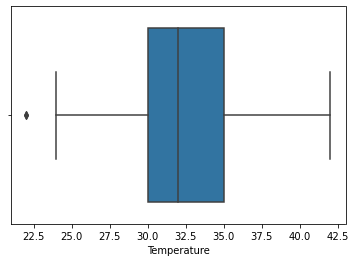

In [60]:
sns.boxplot(df['Temperature'])

#### Observation :
- There is an outlier in the lower side of the Temperature feature

<AxesSubplot:xlabel='Ws'>

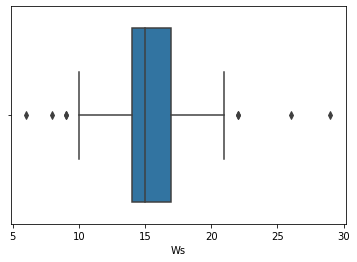

In [61]:
sns.boxplot(df['Ws'])

#### Observation :
- There are outliers in both side of the Ws feature

<AxesSubplot:xlabel='Rain'>

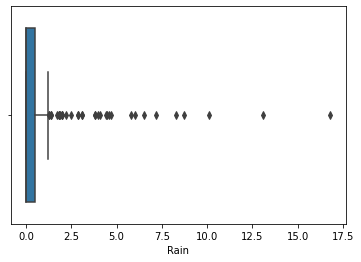

In [62]:
sns.boxplot(df['Rain'])

#### Observation :
- There are outliers in the right side of the Rain feature

<AxesSubplot:xlabel='RH'>

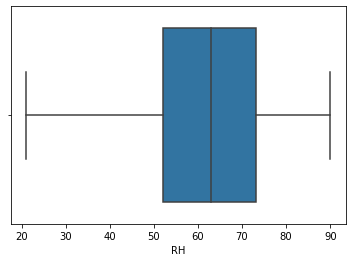

In [63]:
sns.boxplot(df['RH'])

#### Observation :
- There is no outlier in the RH feature

<AxesSubplot:xlabel='FWI'>

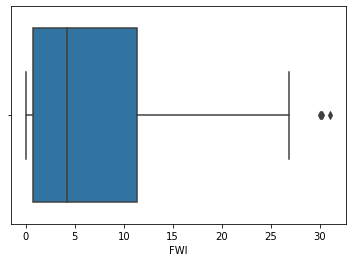

In [64]:
sns.boxplot(df['FWI'])

#### Observation :
- There are outliers in right side of the FWI feature

<AxesSubplot:xlabel='ISI'>

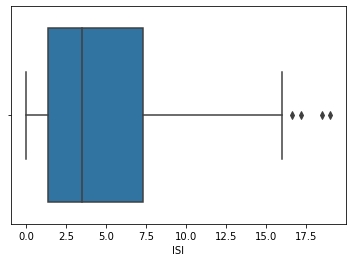

In [65]:
sns.boxplot(df['ISI'])

#### Observation :
- There are outliers in the right side of the ISI feature

In [66]:
df.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.433281
BUI             201.777024
FWI              55.337076
Classes           0.246711
Region            0.251029
dtype: float64

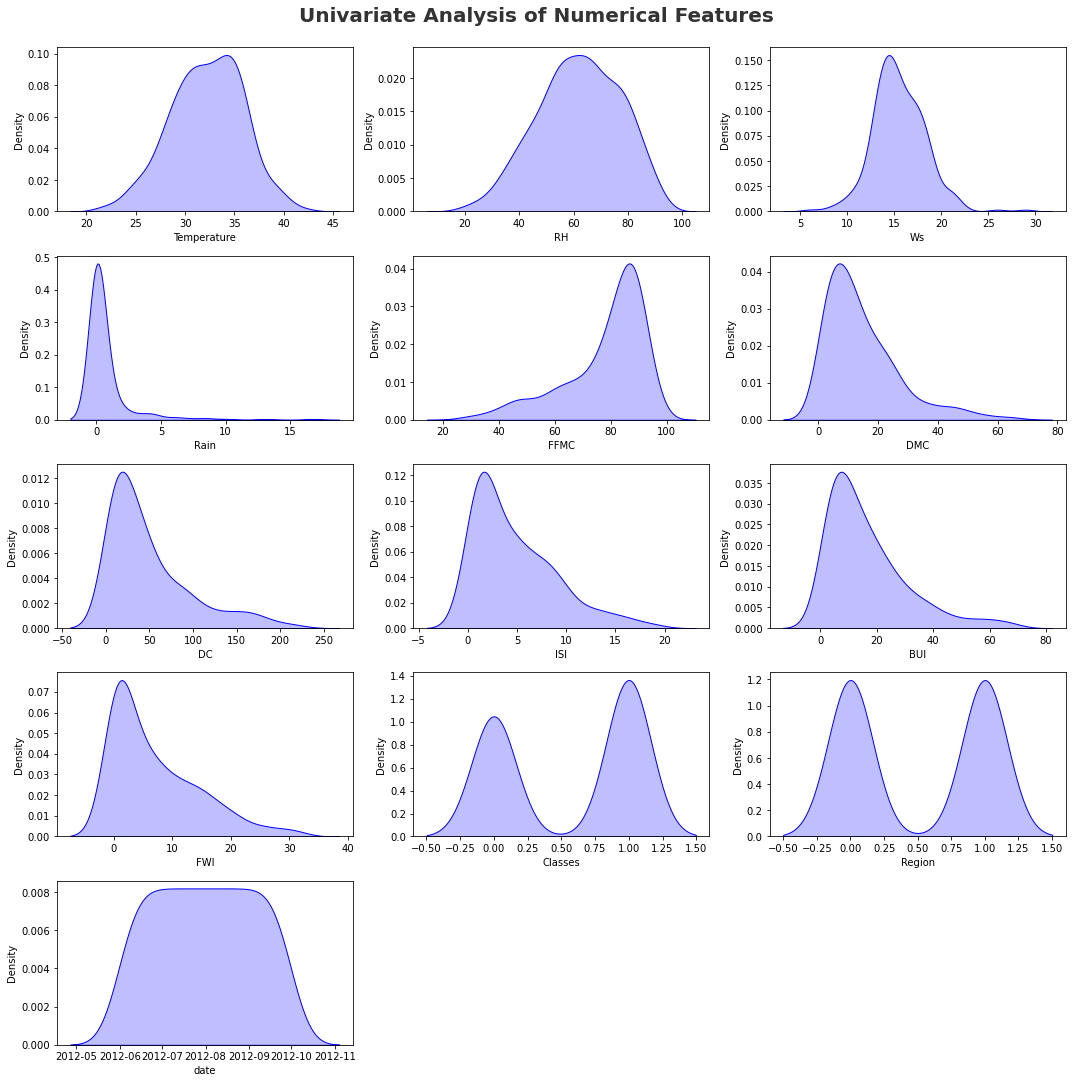

In [67]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df_num)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[df_num[i]], shade=True, color='b')
    plt.xlabel(df_num[i])
    plt.tight_layout()

#### Observations :
- Rain, DMC, DC, ISI, BUI, FWI are Right Skewed or Positively Skewed.
- FFMC is Left Skewed or Negatively Skewed.
- Ws is slightly Right Skewed
- RH is slightly Left skewed
- In Rain, FMCC, DMC, DC, ISI, FWI features there are more outliers

### Scatter plot to see the trend in each numerical columns

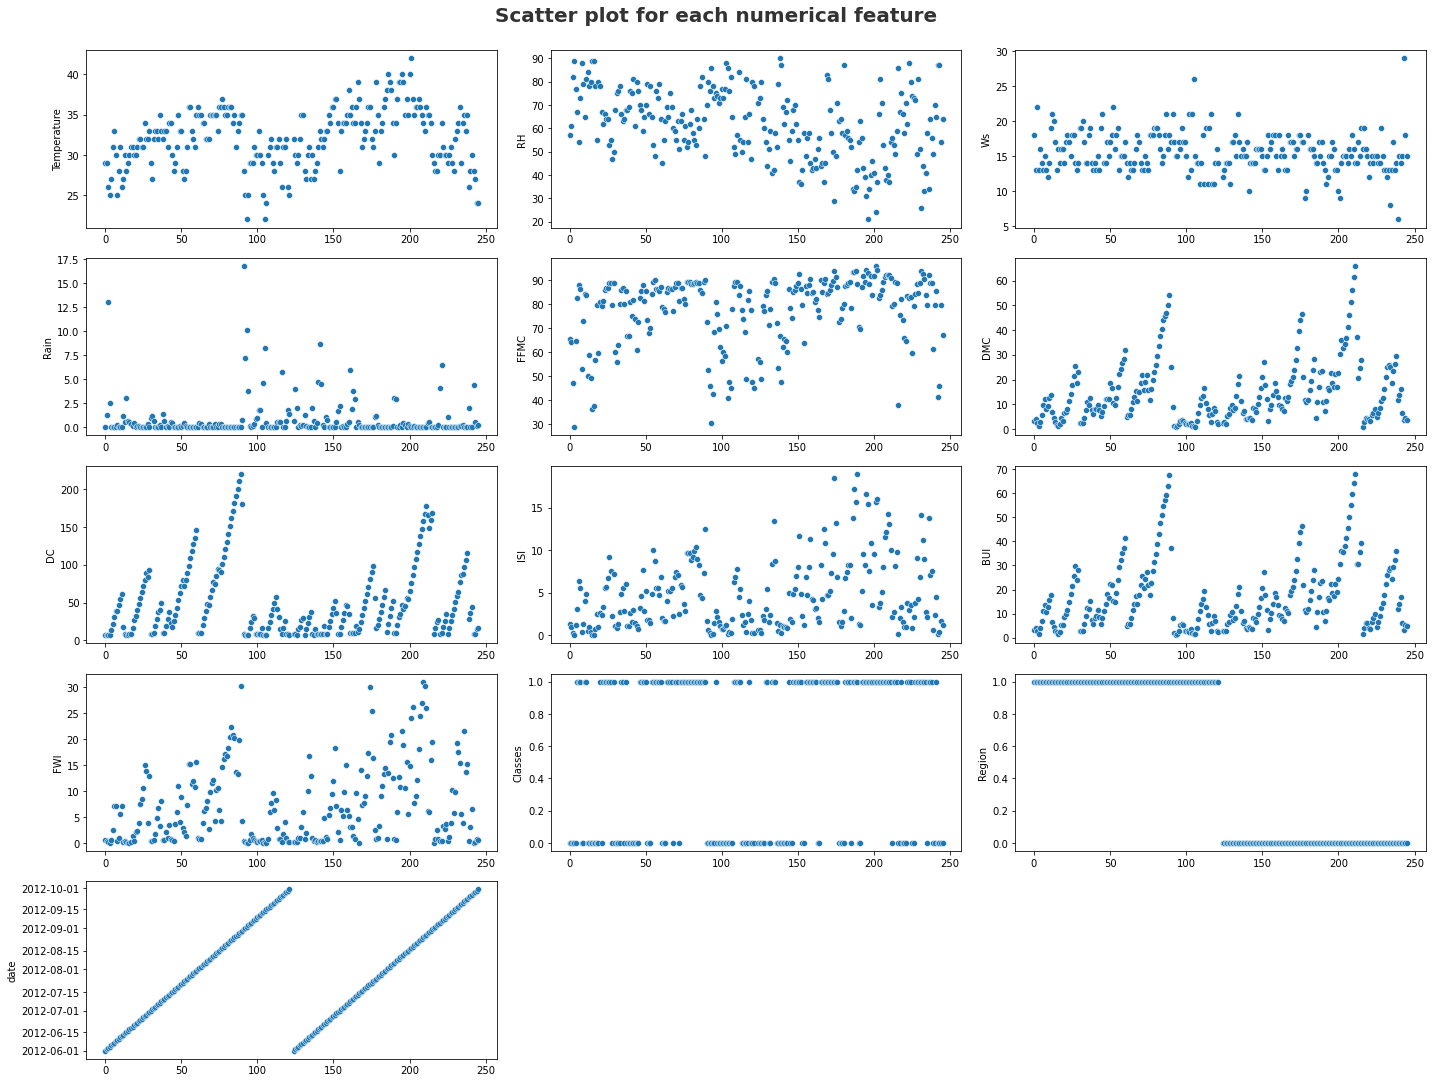

In [68]:
plt.figure(figsize=(20,15))
plt.suptitle('Scatter plot for each numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(df_num)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=df_num[i], x=df.index, data=df)
    plt.tight_layout()

#### Categorical Features

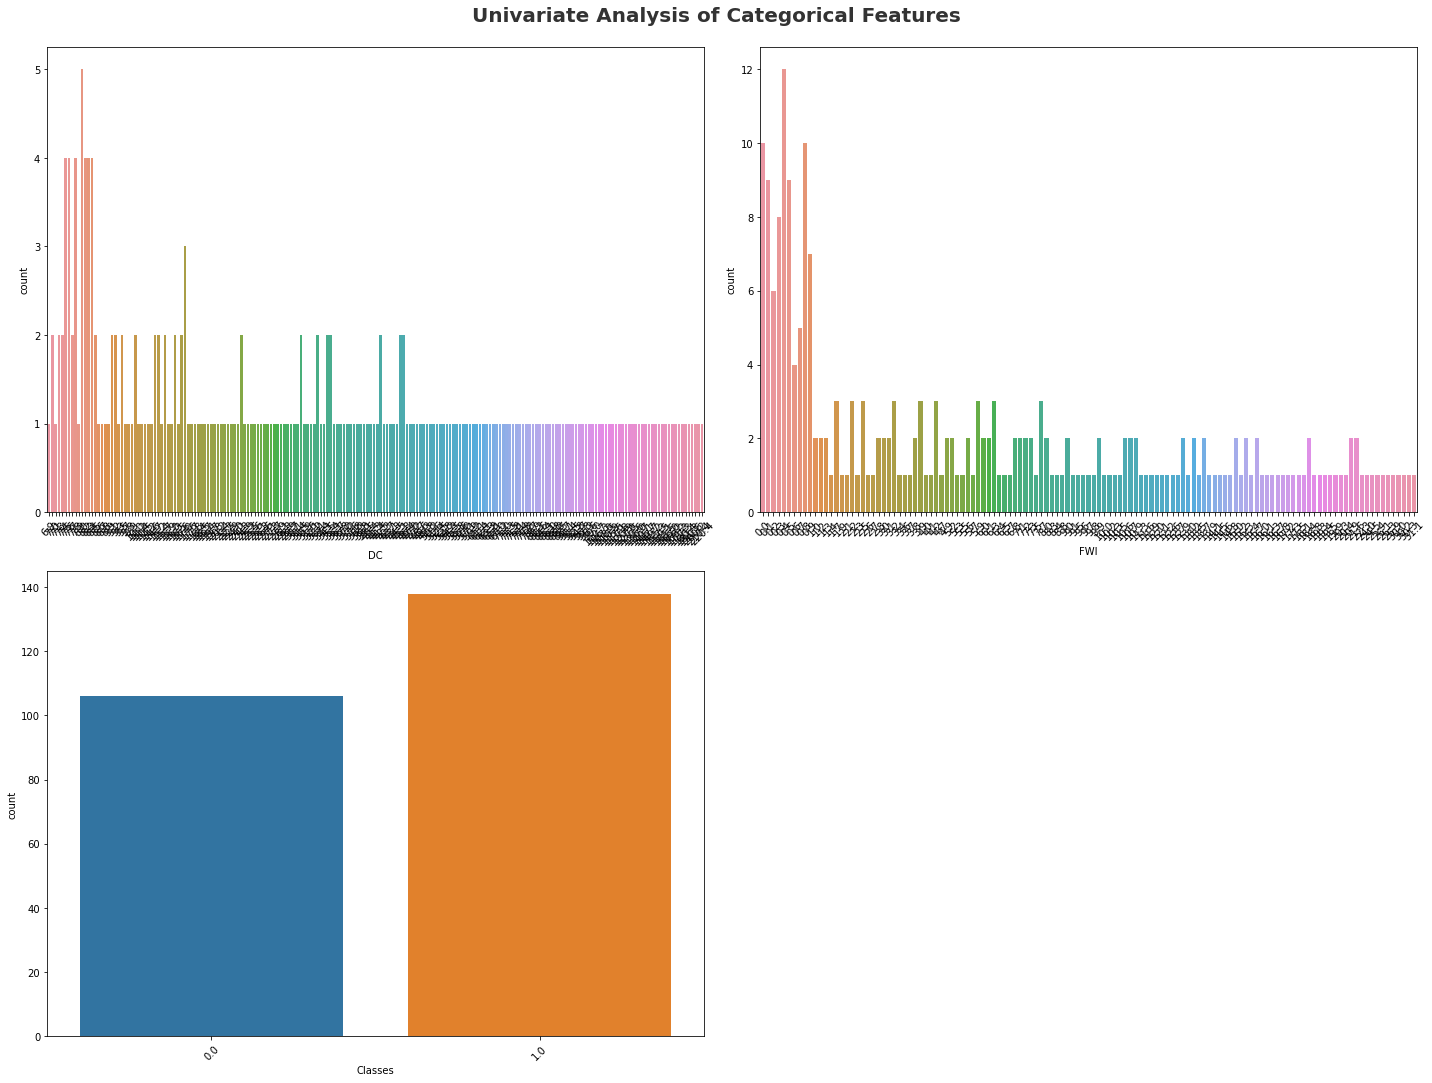

In [69]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['DC', 'FWI', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Bivariate Analysis
Bivariate analysis is the analysis of two variables to find out relationship between them.

##### Line plot

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

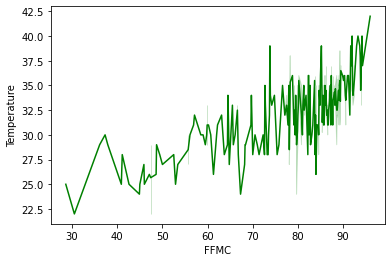

In [70]:
sns.lineplot(x='FFMC', y='Temperature', data=df, color='g')

Observation :
- There is a positive correlation between Temperature and FMCC

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

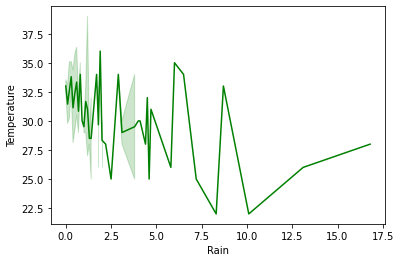

In [71]:
sns.lineplot(x='Rain', y='Temperature', data=df, color='g')

#### Observation :
There is a negative correlation in between Temperature and Rain

### Q-Q plot
To see features distribution

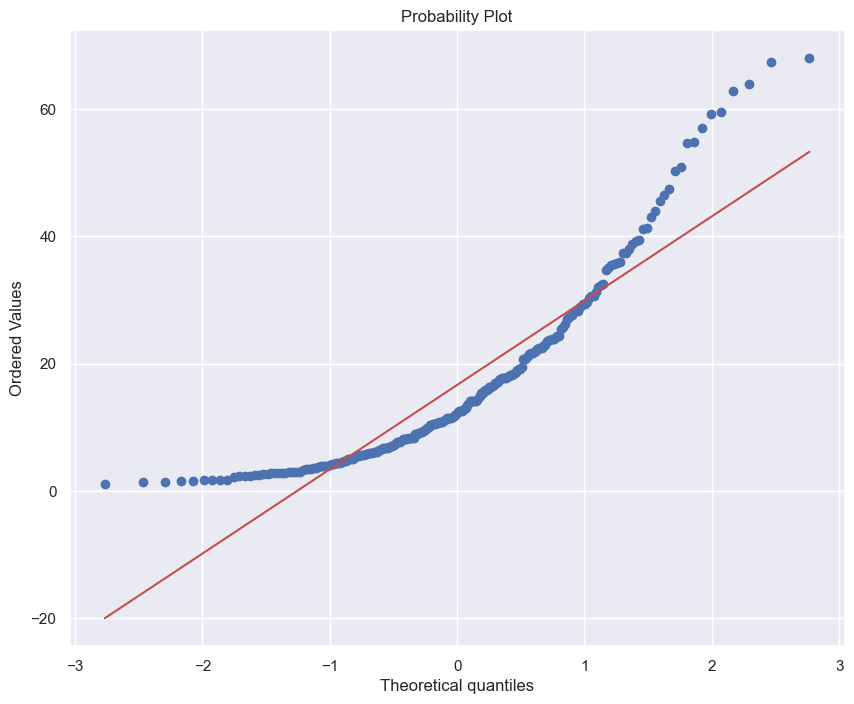

In [155]:
import scipy.stats as stats

stats.probplot(x = df['BUI'], plot=plt, dist='norm')
plt.show()

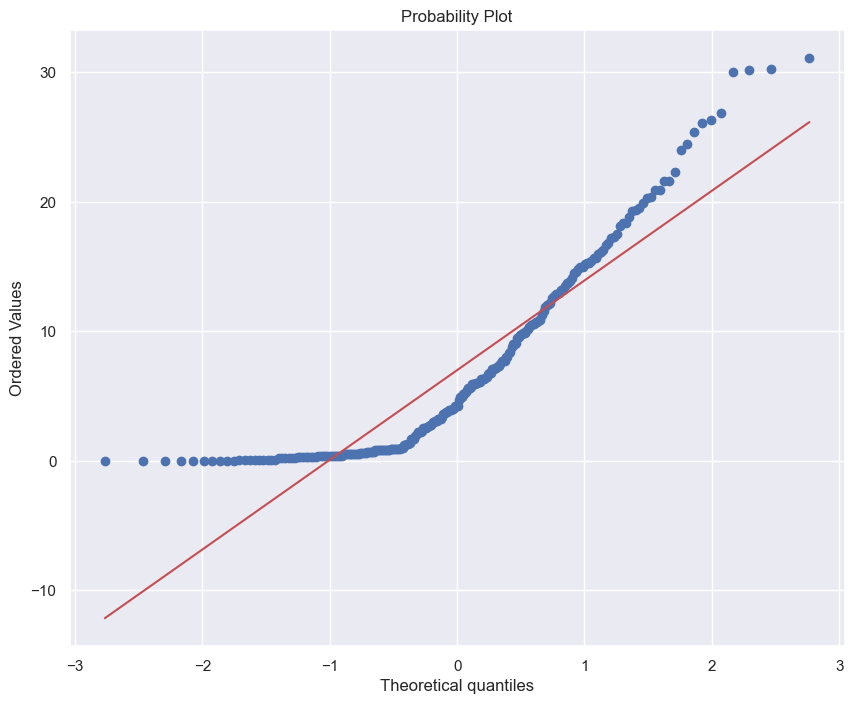

In [156]:
stats.probplot(x = df['FWI'], plot=plt, dist='norm')
plt.show()

##### Joint plot

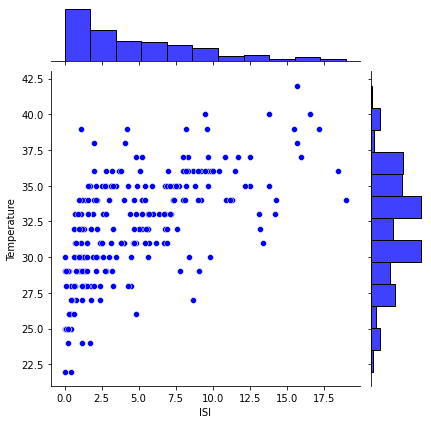

In [72]:
sns.jointplot(x='ISI', y='Temperature', data=df, color='b')

Observation :
- There is a positive correlation between Temperature and ISI

In [73]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1,2012-06-03
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1,2012-06-04
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,30.0,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,0,2012-09-26
242,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,0,2012-09-27
243,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,0,2012-09-28
244,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,0,2012-09-29


Observation :

## Multivariate Analysis

- Multivariate analysis is the analysis of more than one variable.

Plots
- stripplot (categorical vs numerical)
- scatterplot/pairplot (numerical vs numerical) (check correlation)
- boxplot (outliers)
- heatmap (correlation)
- Lineplot (trend in numerical feature with time)

### Check Multicollinearity in Numerical features

In [74]:
df[list(df[df_num].columns)].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.558393,0.518119,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.569997,-0.435023,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.028799,-0.066529,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322682,-0.379449,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686033,0.770114,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874778,0.584188,-0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740189,0.507122,0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.907461,0.735511,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857771,0.583882,-0.087370
FWI,0.558393,-0.569997,0.028799,-0.322682,0.686033,0.874778,0.740189,0.907461,0.857771,1.000000,0.713357,-0.192451


Observation :
- Temperature and RH are negatively correlated
- Temperature and FFMC are positively correlated
- Temperature and ISI are positively correlated

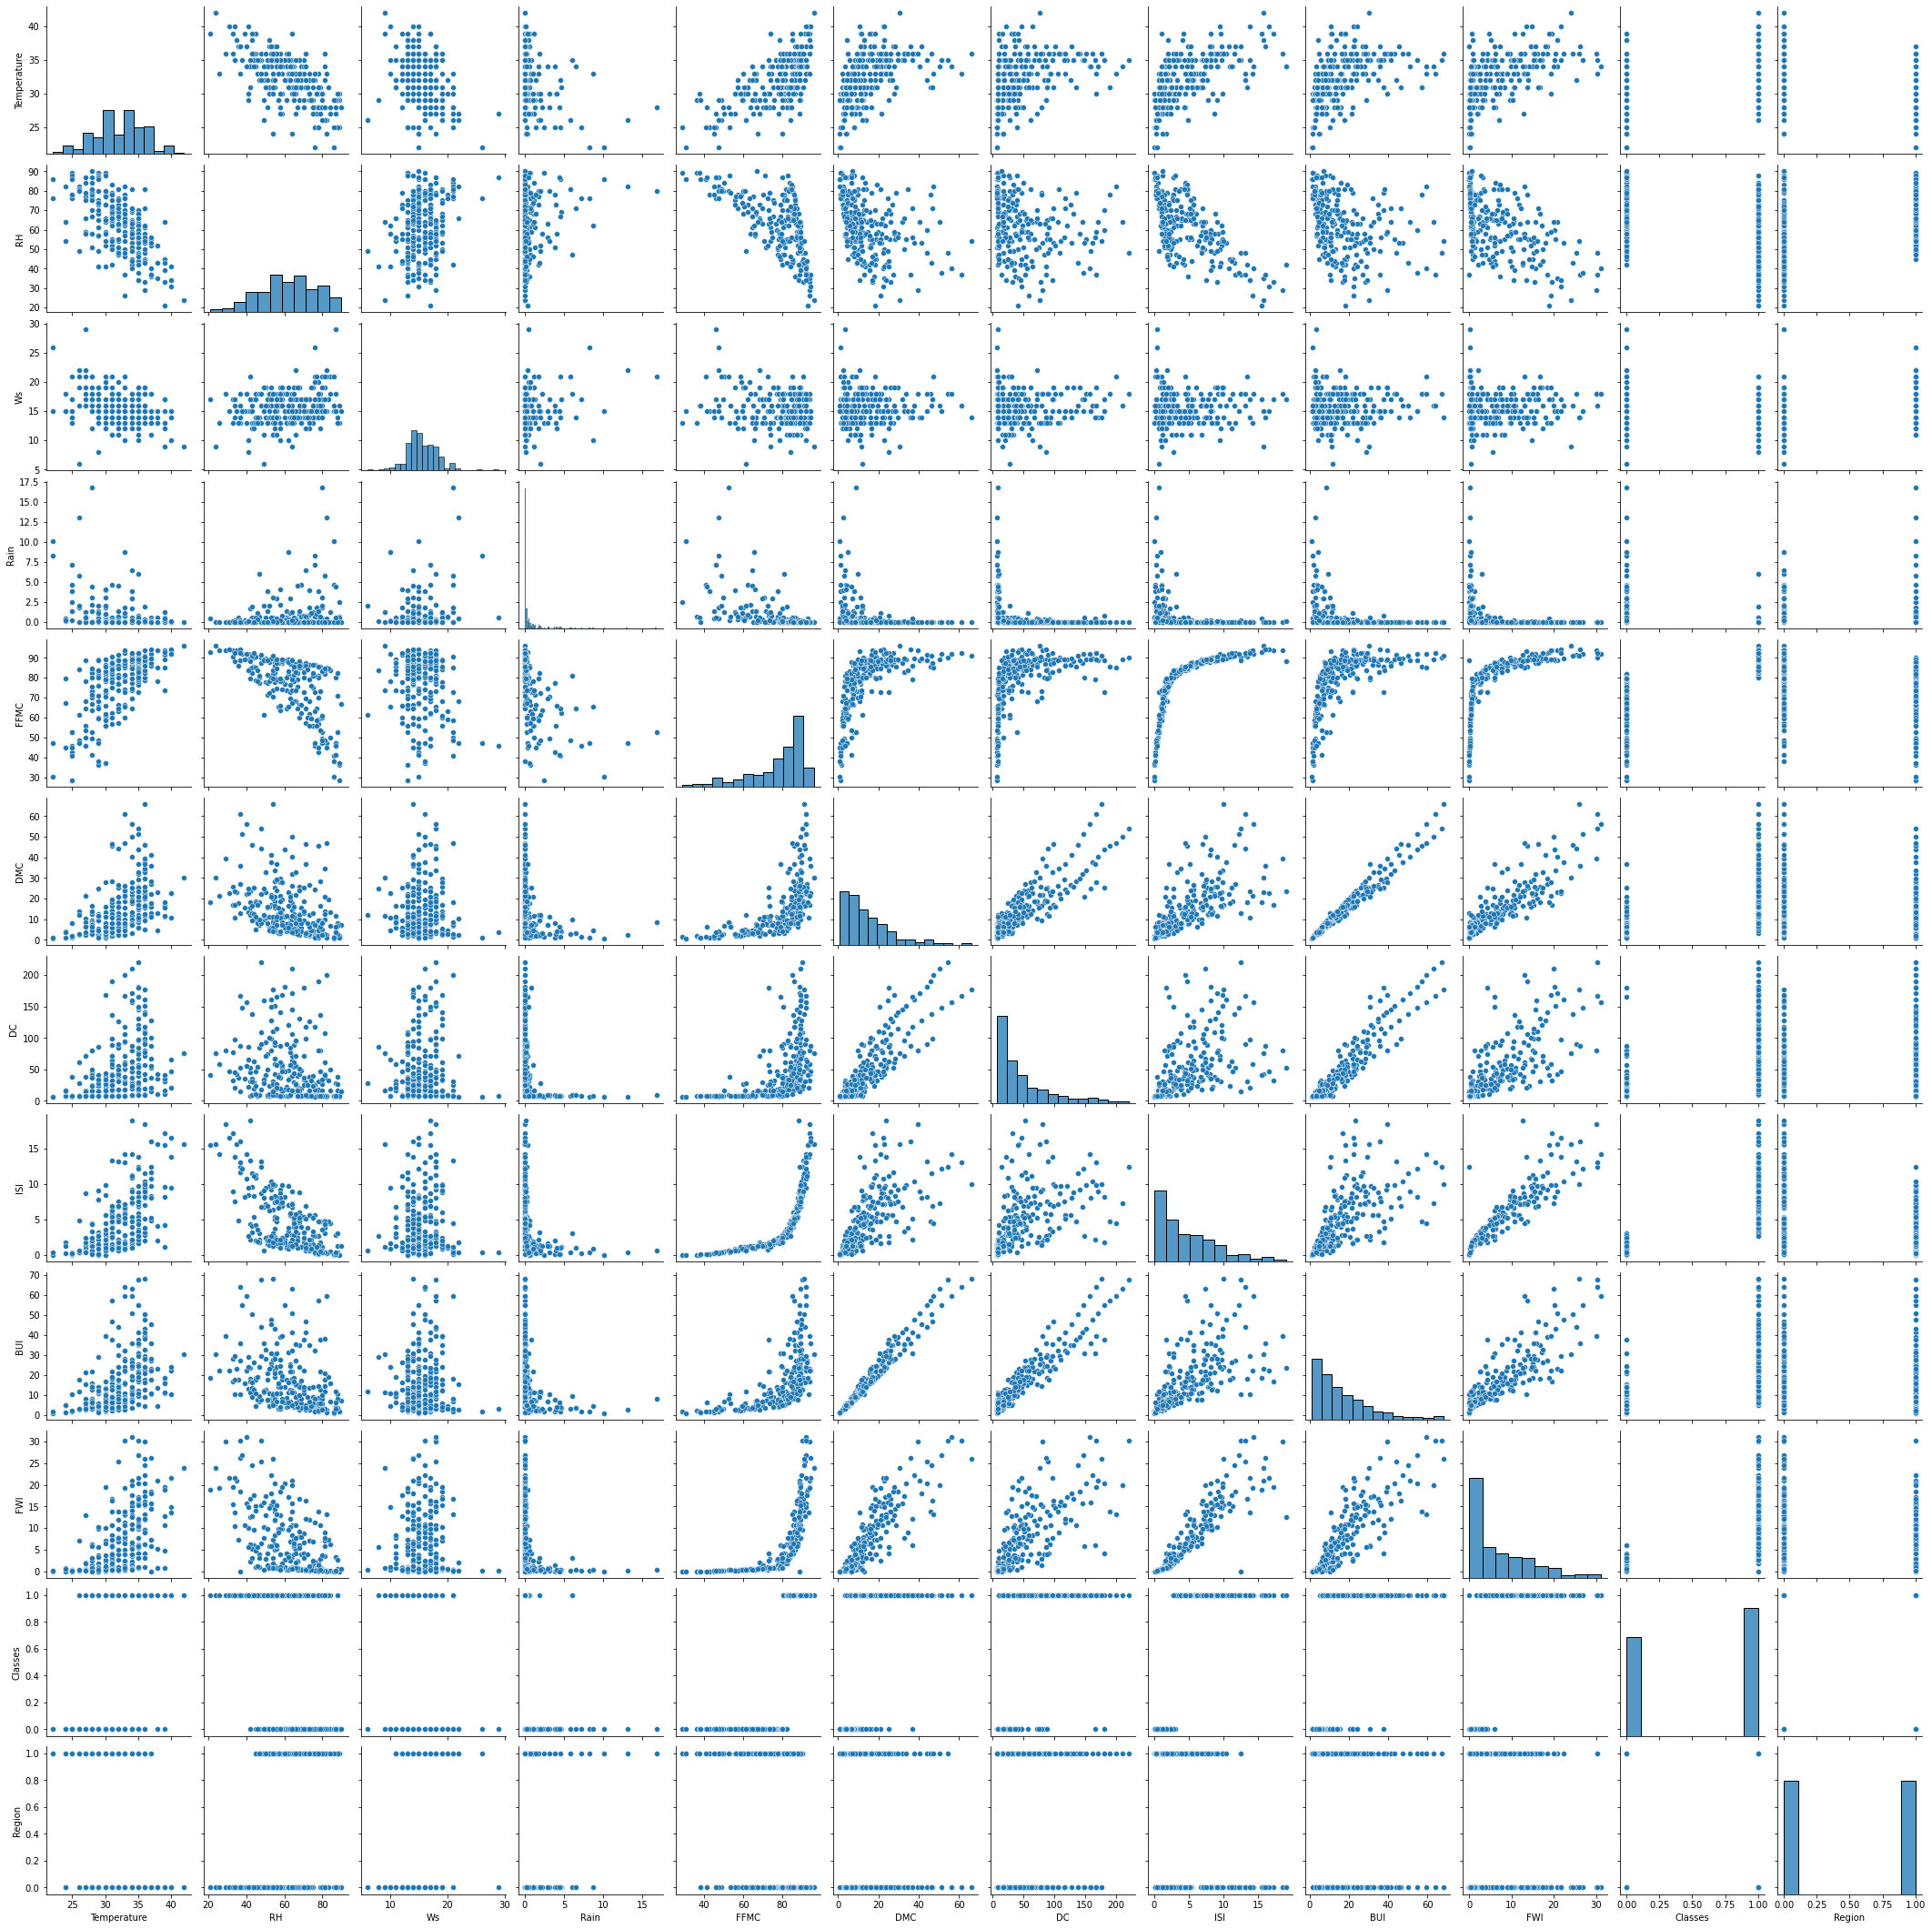

In [75]:
sns.pairplot(df)

Heatmap  :  Correlation between features

<AxesSubplot:>

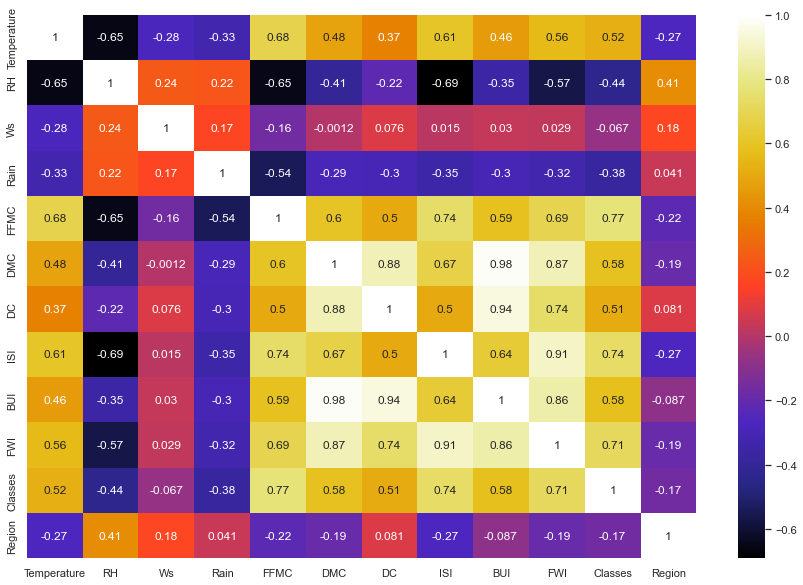

In [76]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), cmap='CMRmap', annot=True)

Observation : 
- Highly +ve correlation between DMC & BMI
- Highly -ve correlation between RH & ISI, RH & FMCC, RH & Temperature

Stripplot : To see relationship between numerical features and target

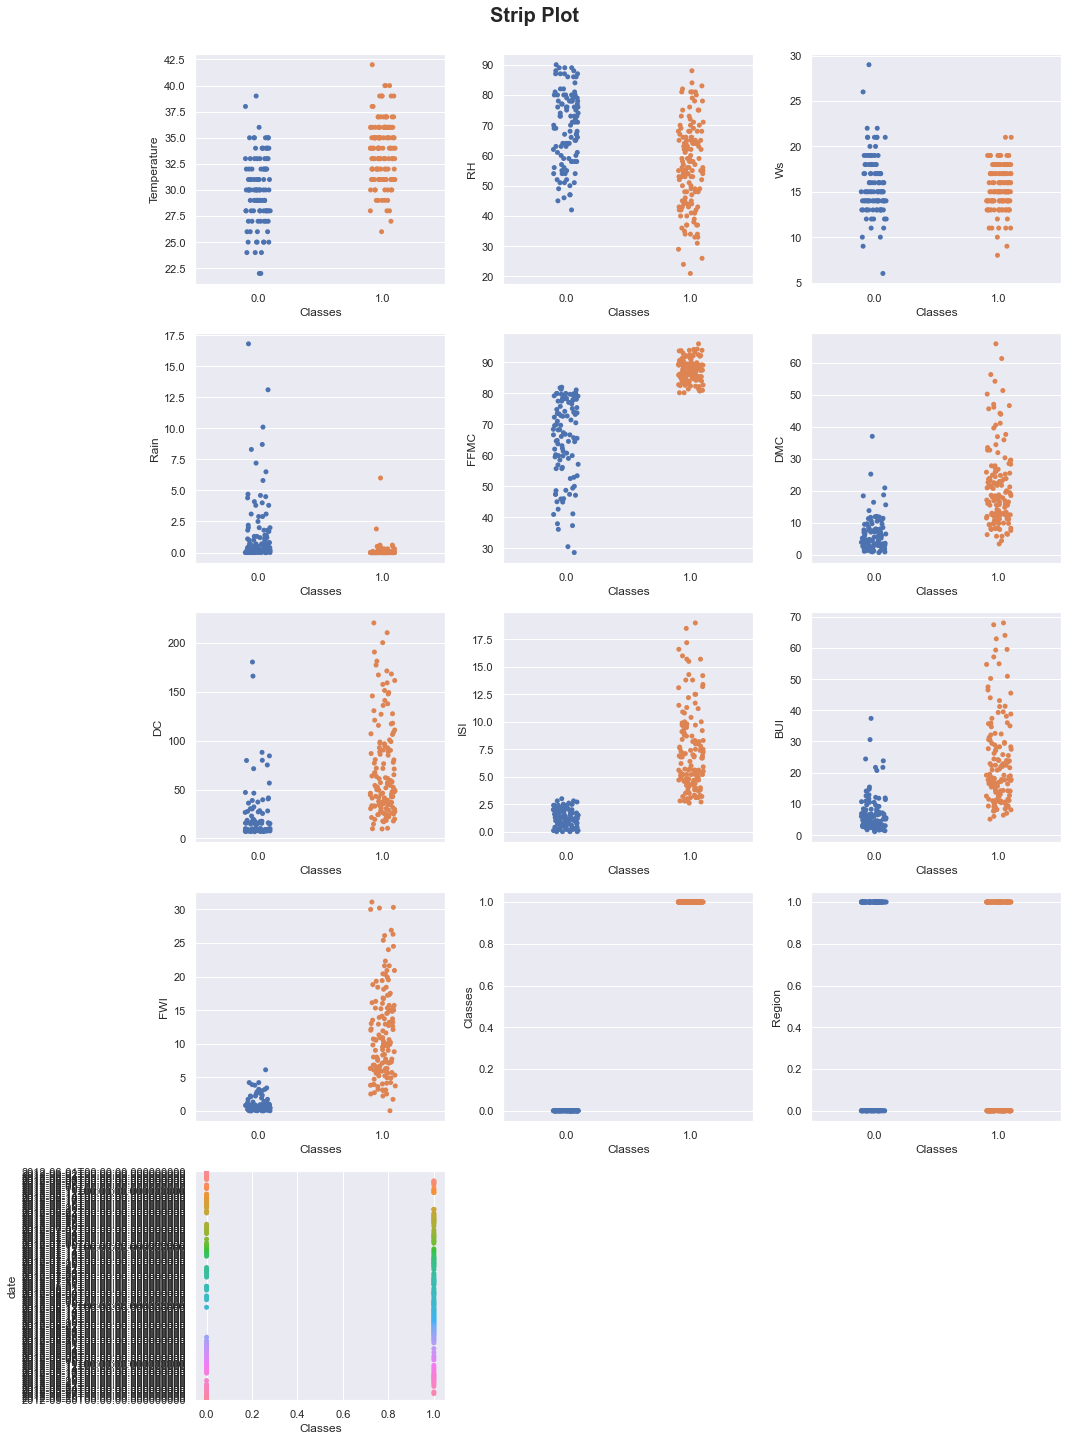

In [77]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(df_num)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=df_num[i], x='Classes', data=df)
    plt.tight_layout()

Observations :
- Note : 0-> Not Fire, 1-> Fire
- Places with higher temperature has fire
- Places with low humidity has fire
- Places with rain < 1.5  has fire
- Places with FFMC > 80 has fire
- Places with ISI > 2.5 has fire
- Places with BUI > 8 has fire

#### Box Plot : To find outliers in the features

<AxesSubplot:>

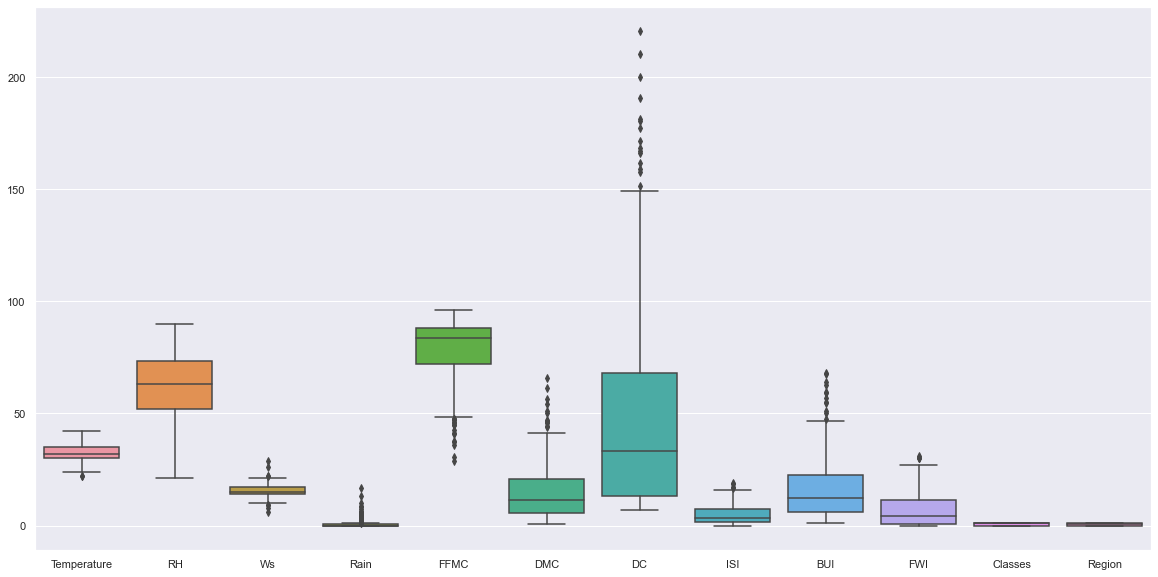

In [78]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df, orient='v')

Observation :
- FFMC, DMC, BUI Rain has more outliers
- Ws, ISI, Temprature have outliers too

In [79]:
continuous_features = [feature for feature in df.columns if df[feature].dtype == 'float']
continuous_features

['Temperature', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

#### plotting histogram

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>,
        <AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>],
       [<AxesSubplot:title={'center':'date'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

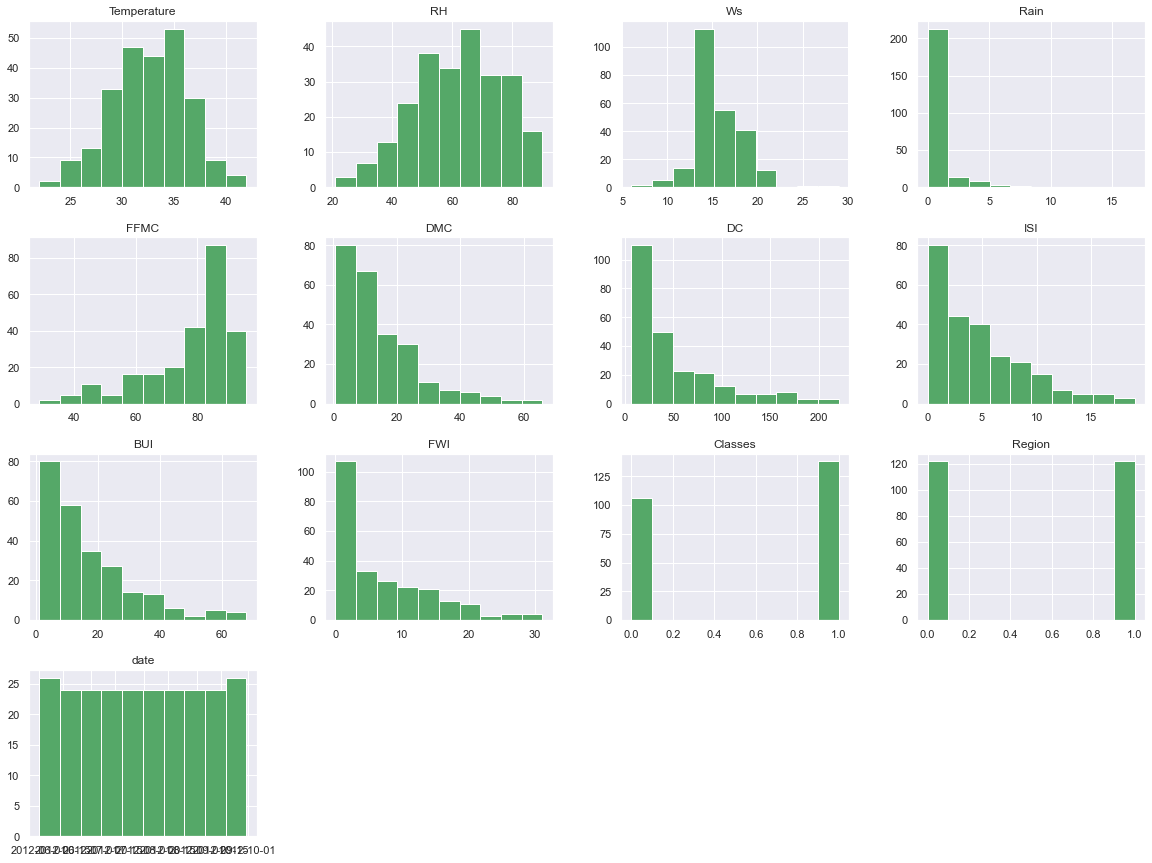

In [80]:
df.hist(figsize=(20,15), color='g')

##### Bar graph

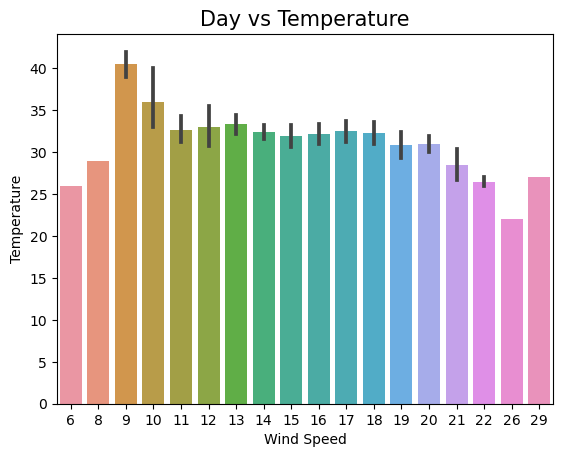

In [81]:
plt.style.use('default')
sns.barplot(x='Ws', y='Temperature', data=df)
plt.title('Day vs Temperature', fontsize=15)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.show()

## 4.3 Graphical Analysis

Consistent Temperature in places

Text(0.5, 0, 'Temperature')

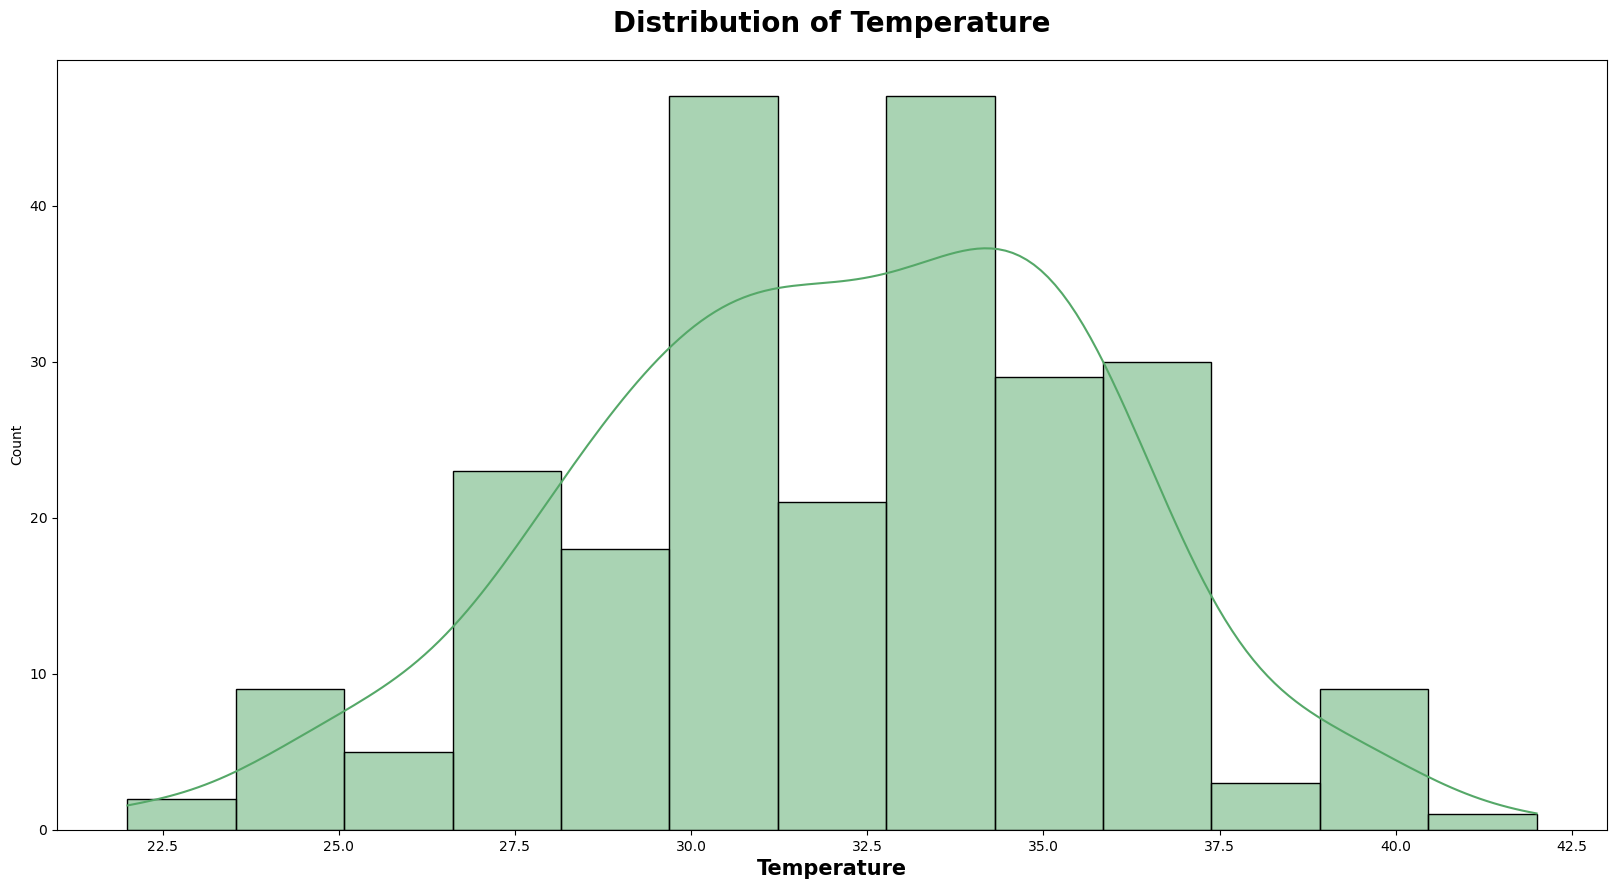

In [82]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature", x=df.Temperature, color='g', kde=True)
plt.title("Distribution of Temperature", weight='bold', fontsize=20, pad=20)
plt.xlabel('Temperature', weight='bold', fontsize=15)

#### Observation :
- The frequent occurring temperature ranges between 30-34

## Highest Temperature recorded
Bar Plot

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

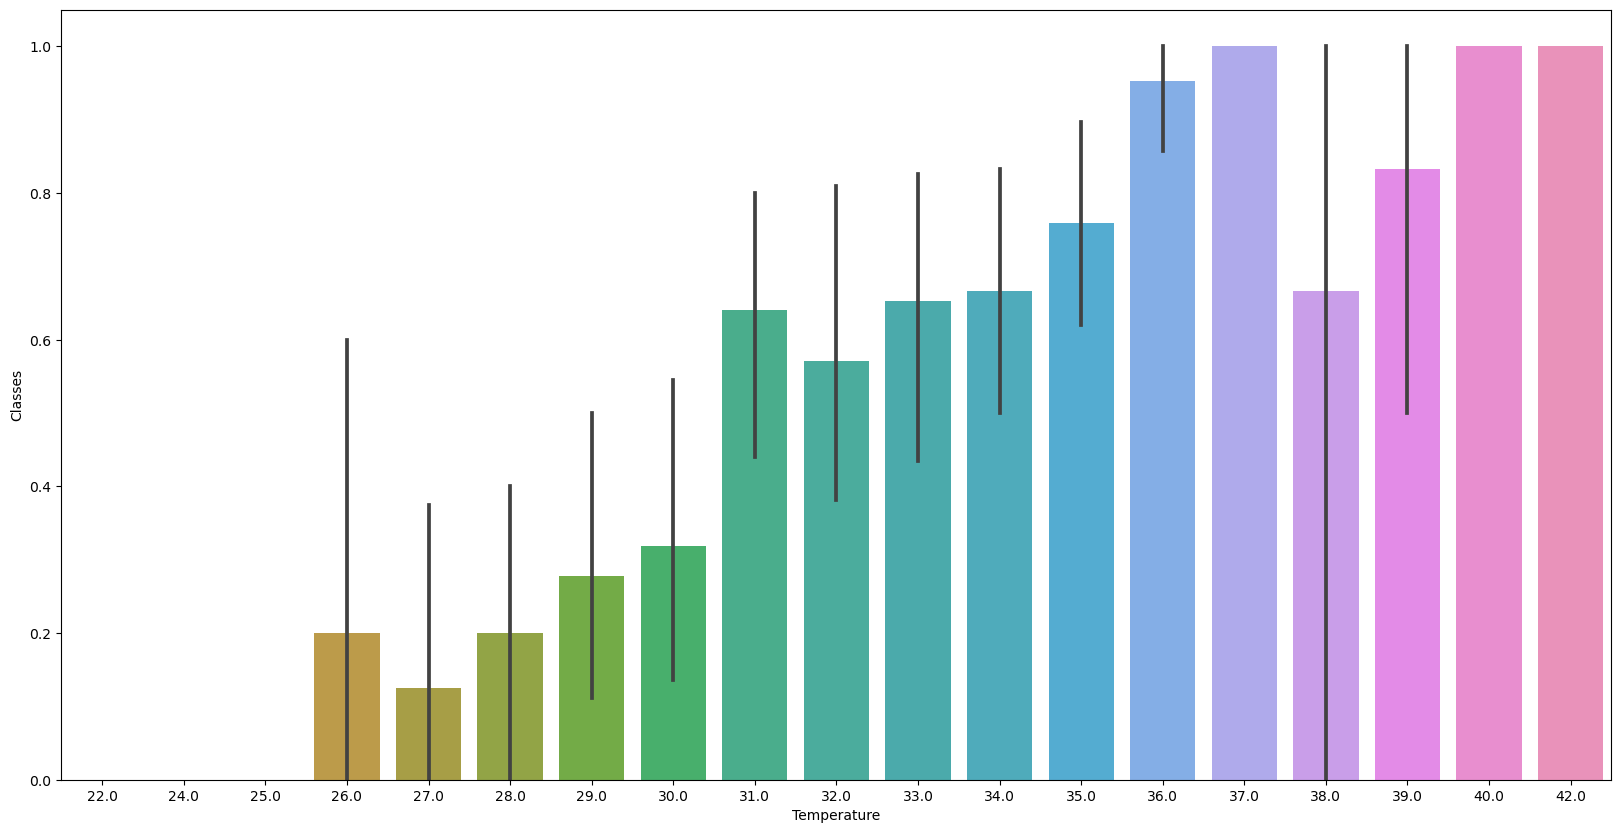

In [83]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

sns.barplot(x='Temperature', y='Classes', data=df)

Observations :
- Highest Temperature is 37, 40, 42

#### The Region with more Rain

<AxesSubplot:xlabel='Region', ylabel='Rain'>

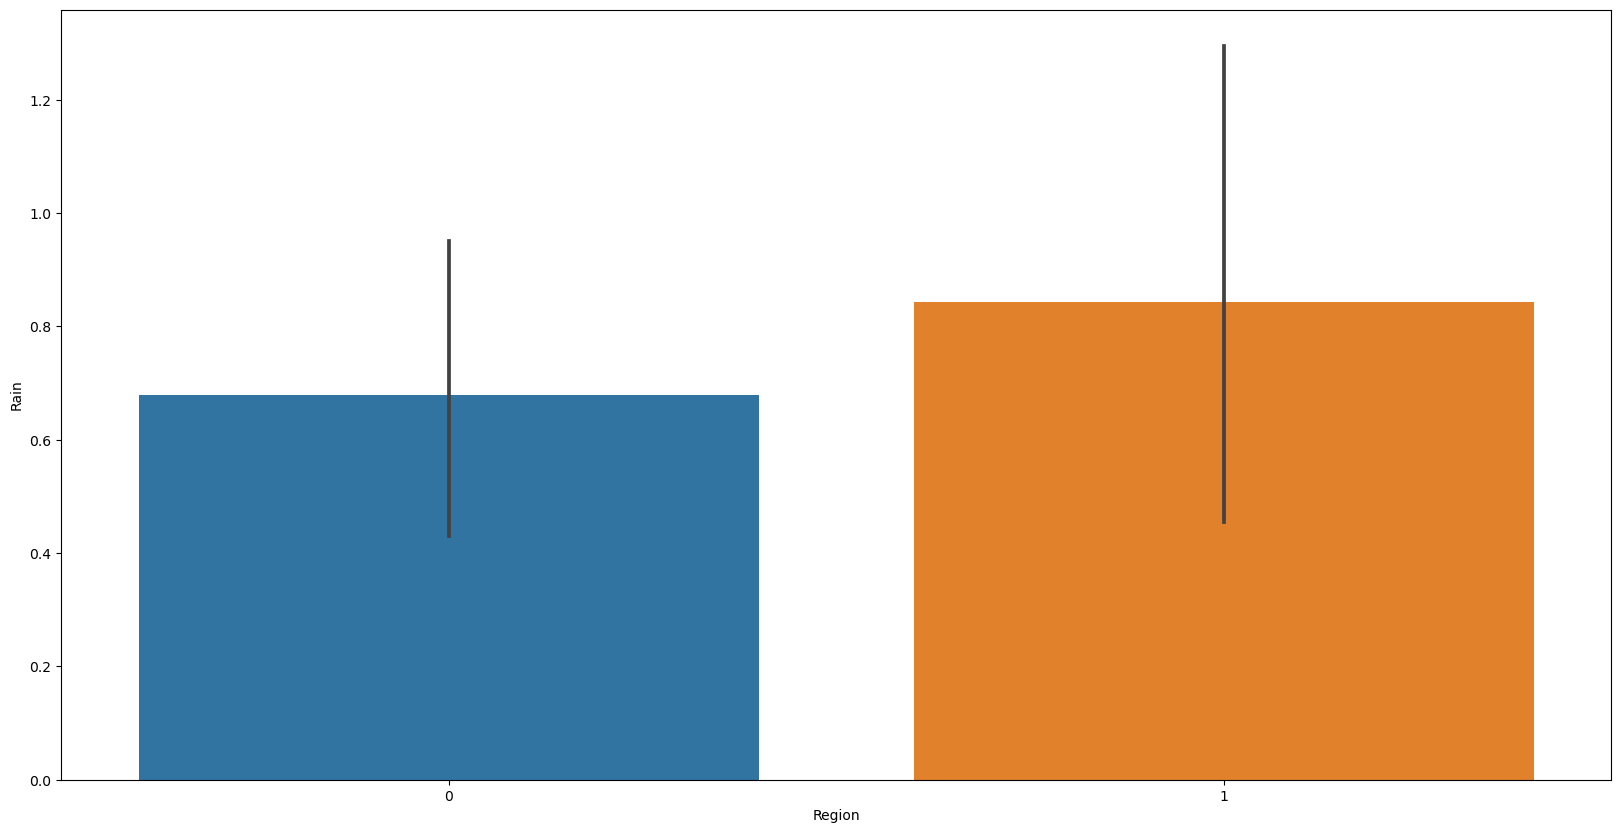

In [84]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
sns.barplot(x='Region', y='Rain', data=df)

Observation :
- Bejaia is the region with more Rain

#### Box plot : Classes Vs Temerature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

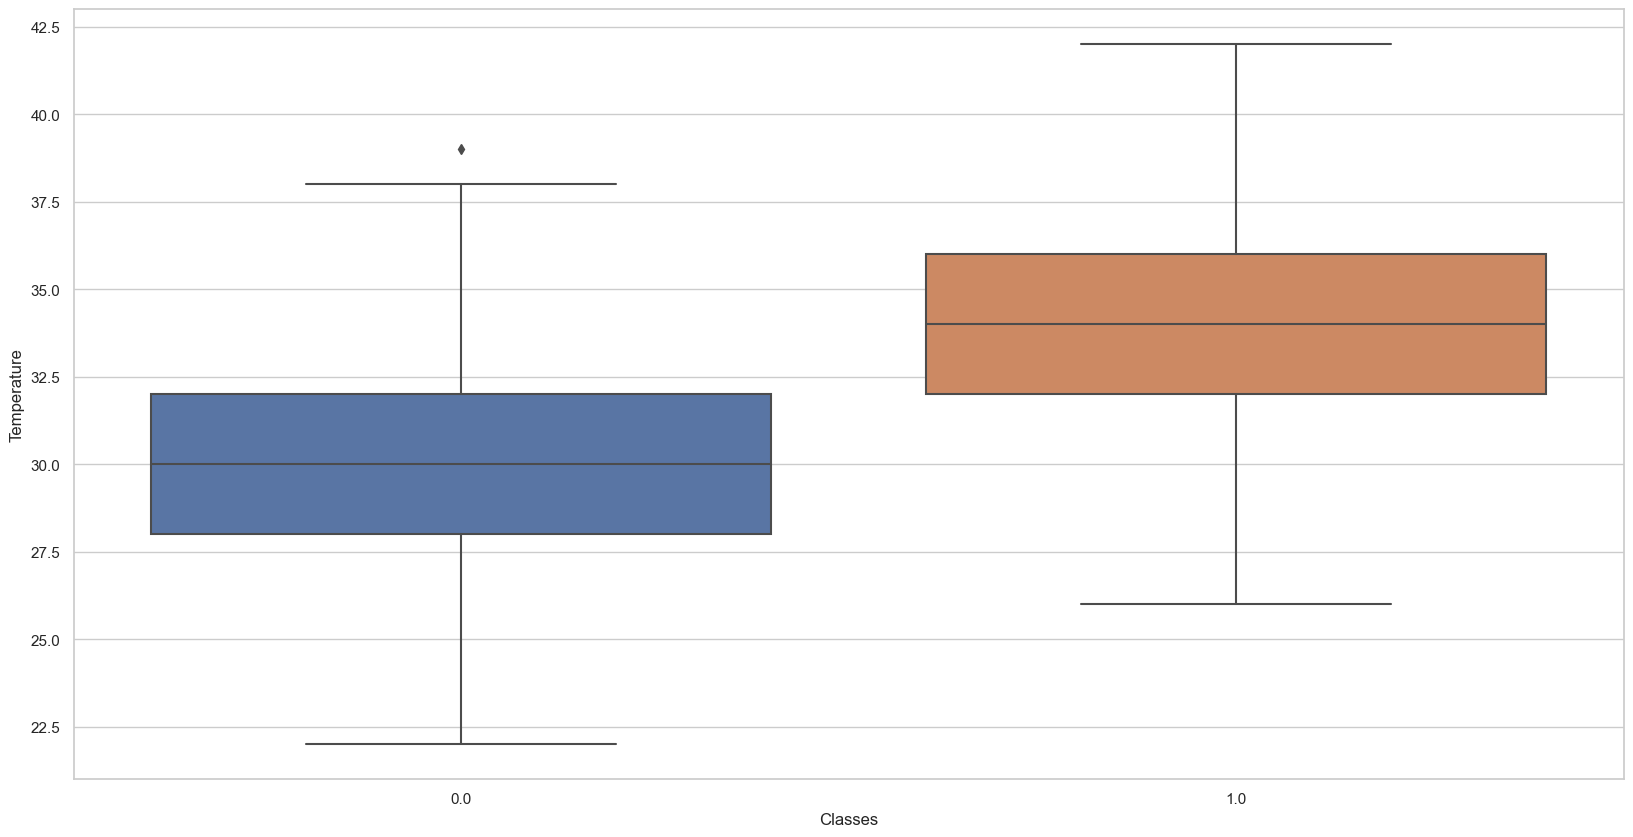

In [85]:
# Box-plot using inbuilt dataset

# importing the required module : seaborn
import seaborn

# Setting the background of the plot
seaborn.set(style='whitegrid')

# Loading Dataset
seaborn.boxplot(x='Classes', y='Temperature', data=df)

Observation :
- There is outlier on 'No Fire' plot. 

#### Box plot : Classes vs Rain

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

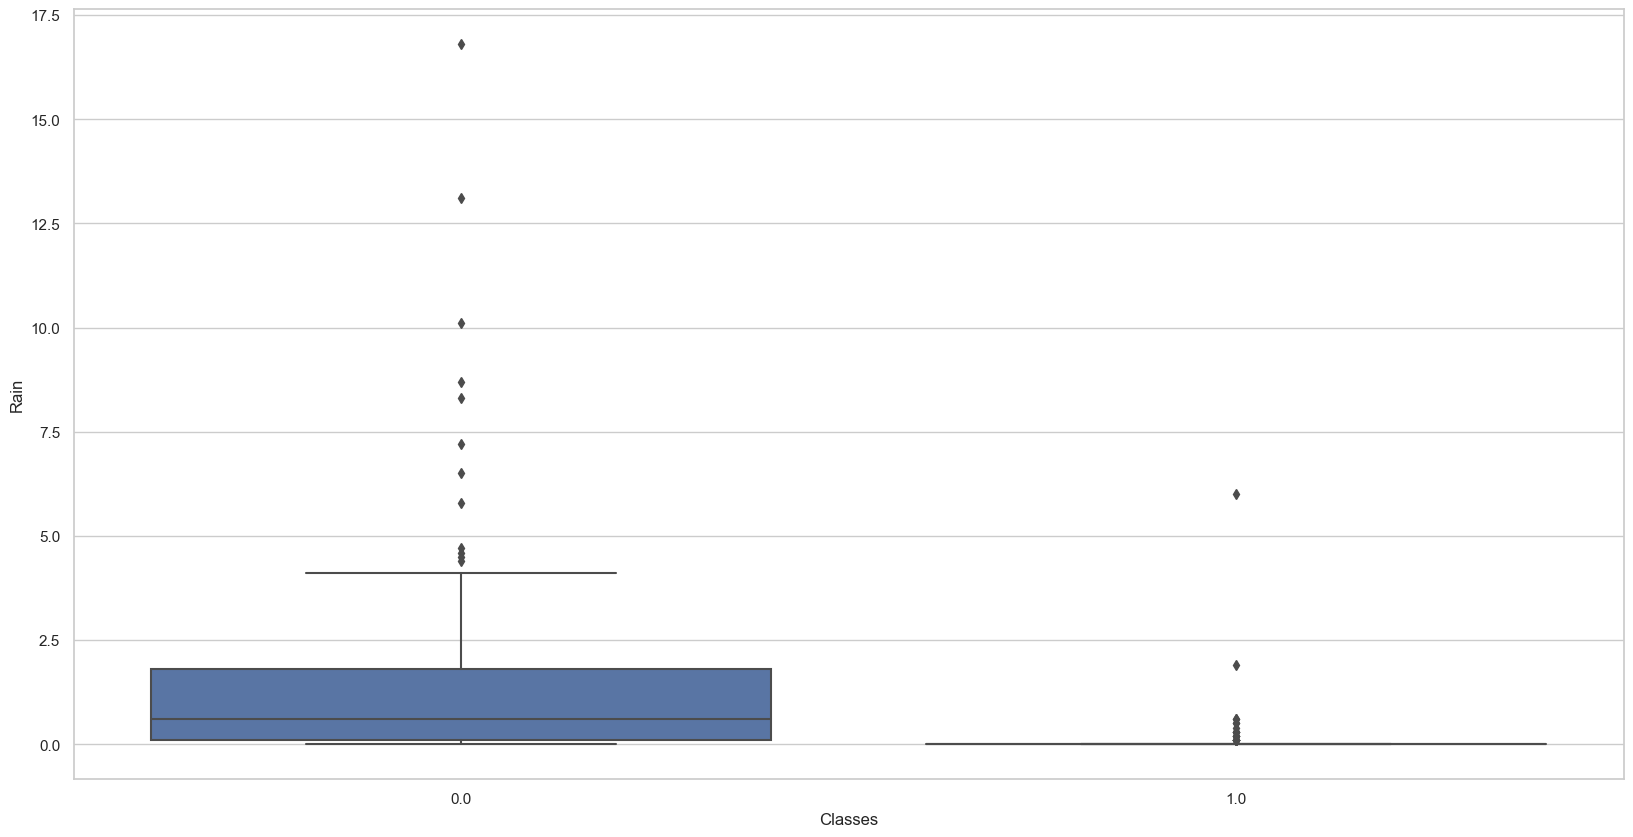

In [86]:
import seaborn

# setting background of the plot
seaborn.set(style='whitegrid')

# Loading dataset
seaborn.boxplot(x='Classes', y='Rain', data=df)

Observations :
- There are days with Rain where Fire in the forest

Text(0, 0.5, 'Temperature')

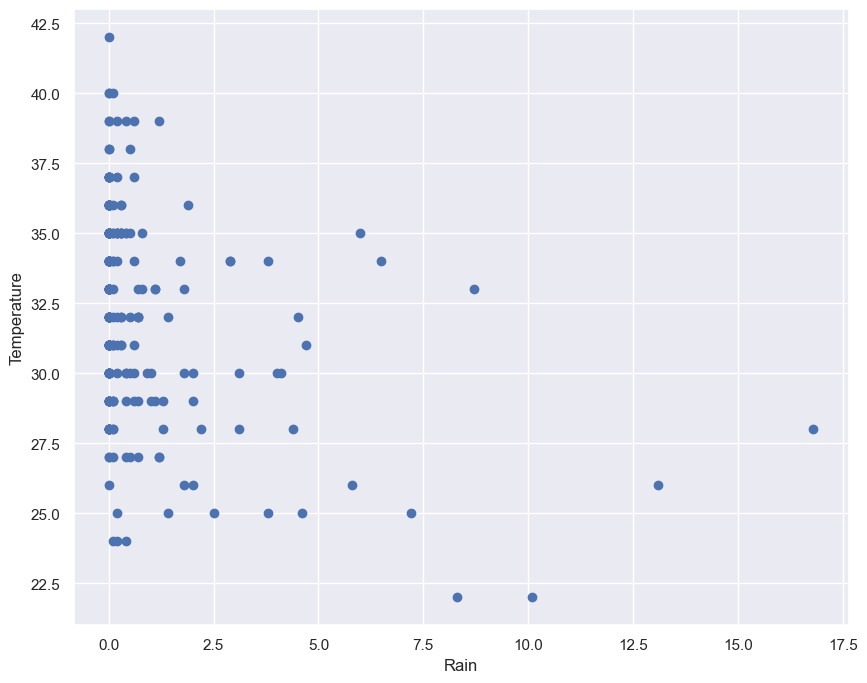

In [87]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['Rain'], df['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

#### Observation :
- There is a negative correlation between Rain and Temperature

Text(0, 0.5, 'Temperature')

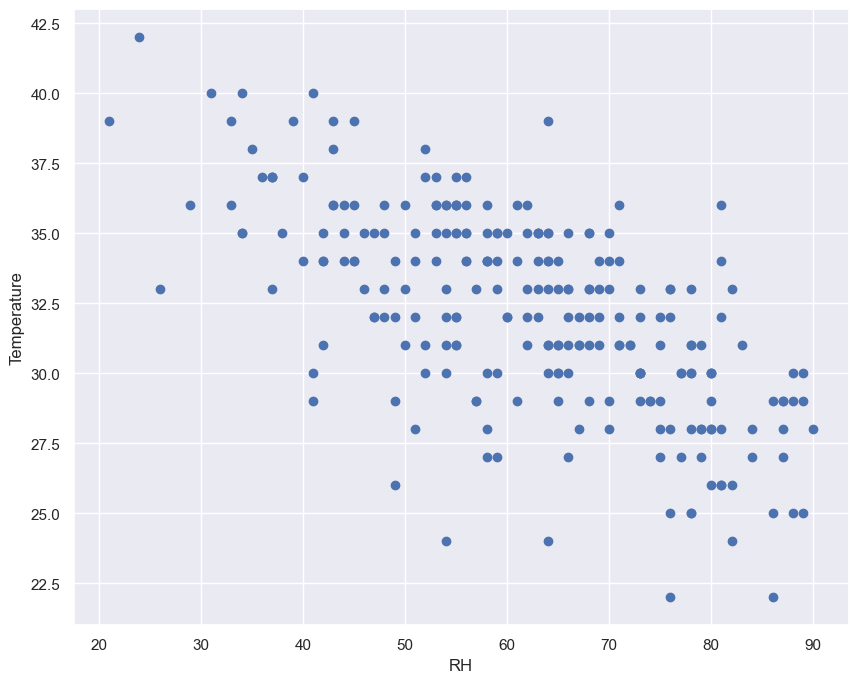

In [88]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['RH'], df['Temperature'])
plt.xlabel('RH')
plt.ylabel('Temperature')

#### Observation :
- There is a negative correlation between RH and Temperature

Text(0, 0.5, 'Temperature')

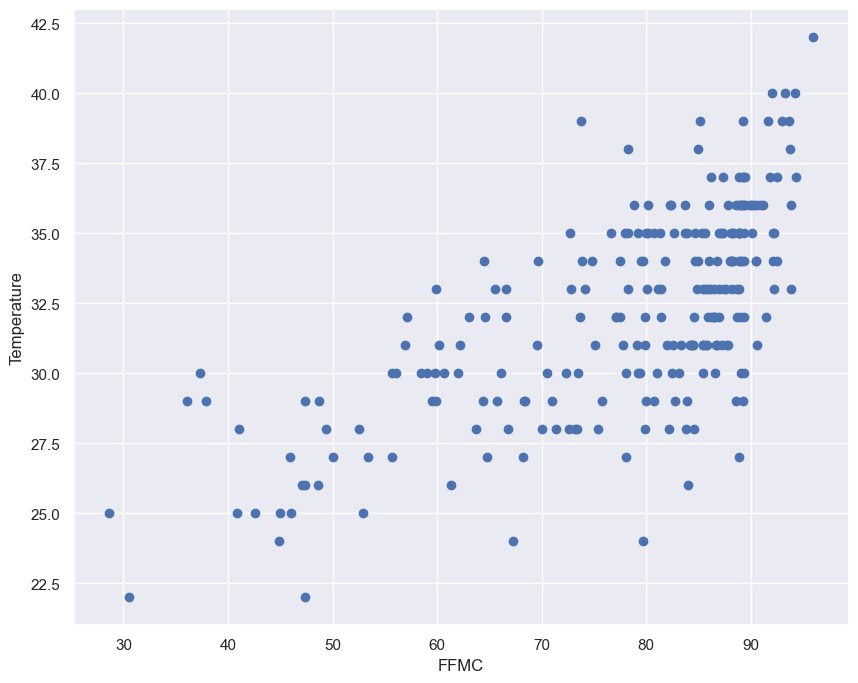

In [89]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['FFMC'], df['Temperature'])
plt.xlabel('FFMC')
plt.ylabel('Temperature')

#### Observation :
- There is a positive correlation between FFMC and Temperature

Text(0, 0.5, 'Temperature')

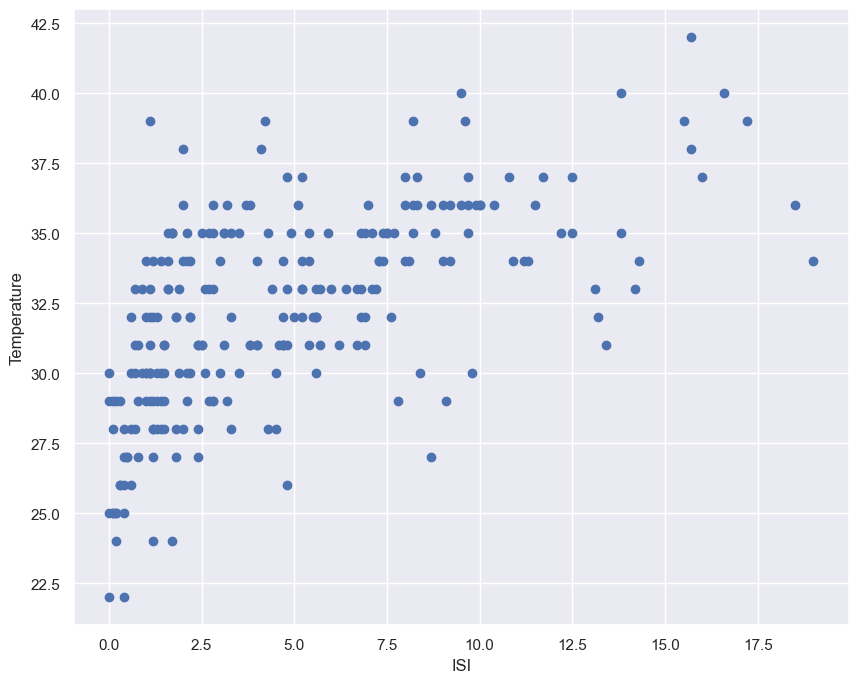

In [90]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['ISI'], df['Temperature'])
plt.xlabel('ISI')
plt.ylabel('Temperature')

#### Observation :
- There is a positive correlation between ISI and Temperature

### Regplot

Text(0, 0.5, 'Temperature')

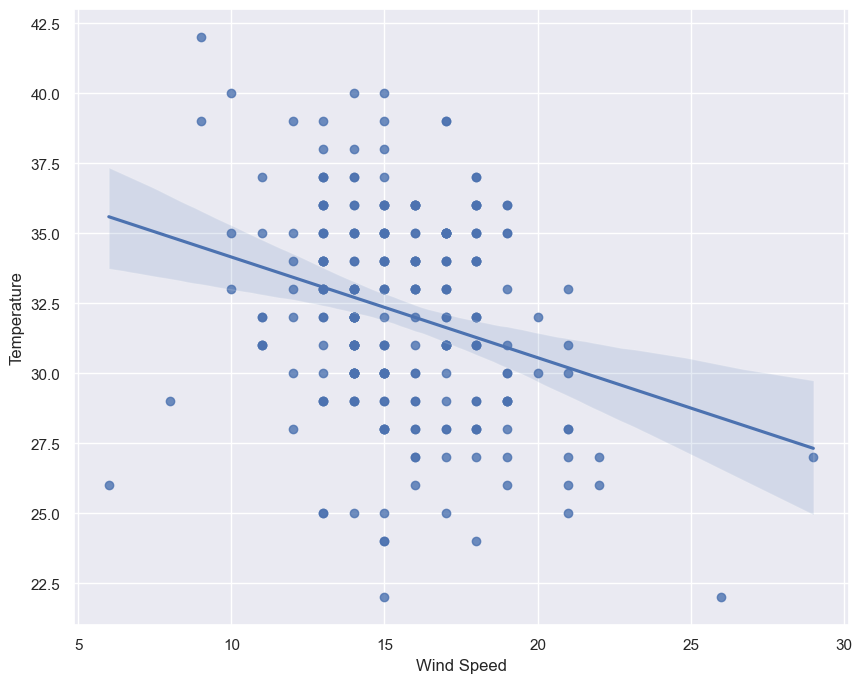

In [91]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='Ws', y='Temperature', data=df)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')

#### Observation :
- There is a negative correlation between Ws and Temperature

Text(0, 0.5, 'Temperature')

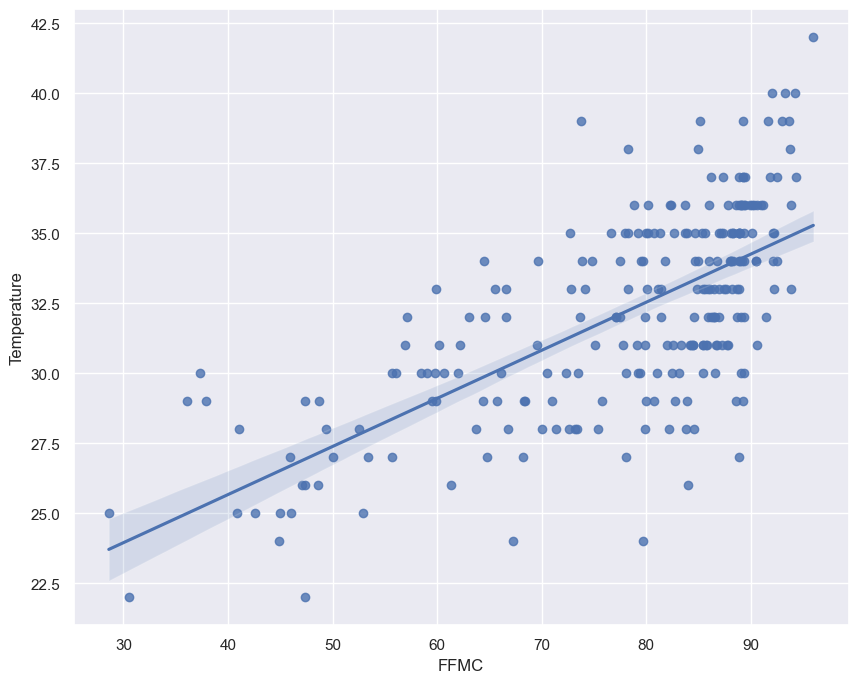

In [92]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='FFMC', y='Temperature', data=df)
plt.xlabel('FFMC')
plt.ylabel('Temperature')

#### Observation :
- There is a positive correlation between FFMC and Temperature

Text(0, 0.5, 'Temperature')

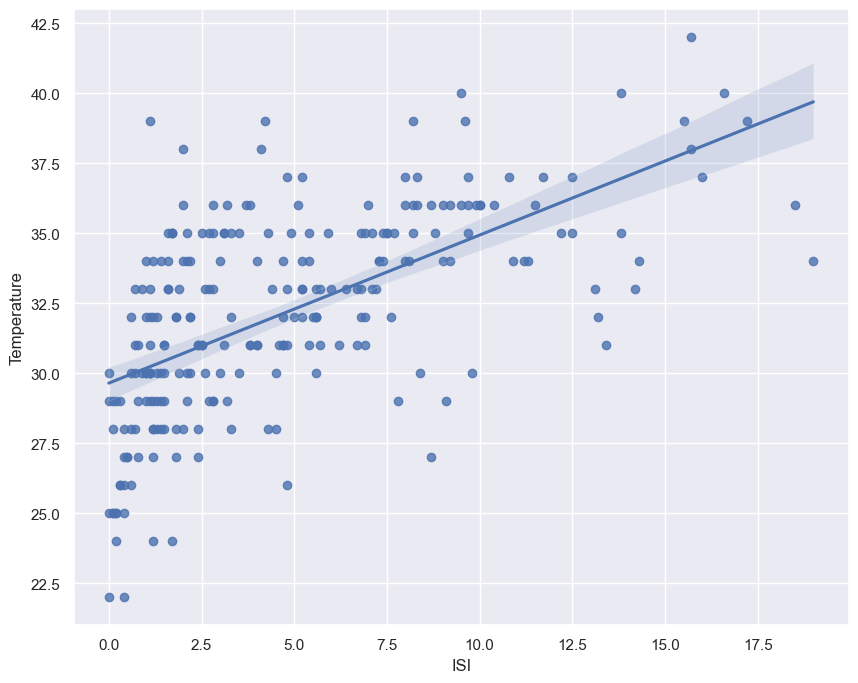

In [93]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='ISI', y='Temperature', data=df)
plt.xlabel('ISI')
plt.ylabel('Temperature')

#### Observation :
- There is a positive correlation between ISI and Temperature

In [94]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1,2012-06-03
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1,2012-06-04
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1,2012-06-05


In [95]:
## Independent and Dependent feature
# Removing 'date' column from features as it is not related

X = df.iloc[:, 1:-1]
y = df.iloc[:,:1]

In [96]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1


In [97]:
y = y.squeeze()
y

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
241    30.0
242    28.0
243    27.0
244    24.0
245    24.0
Name: Temperature, Length: 244, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=10)

In [100]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0.0,0
78,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1.0,1
25,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1.0,1
126,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0.0,0
178,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
64,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1.0,1
15,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0.0,1
230,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1.0,0
127,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0.0,0


In [101]:
y_train

239    26.0
78     36.0
25     31.0
126    29.0
178    39.0
       ... 
64     34.0
15     29.0
230    32.0
127    30.0
9      28.0
Name: Temperature, Length: 163, dtype: float64

In [102]:
X_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
164,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0.0,0
60,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,1.0,1
61,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,0.0,1
63,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,0.0,1
69,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
171,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,1.0,0
234,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1.0,0
146,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0.0,0
210,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1.0,0


In [103]:
y_test

164    34.0
60     35.0
61     36.0
63     35.0
69     35.0
       ... 
171    33.0
234    29.0
146    33.0
210    33.0
105    22.0
Name: Temperature, Length: 81, dtype: float64

In [104]:
X_train.shape

(163, 11)

In [105]:
y_train.shape

(163,)

In [106]:
X_test.shape

(81, 11)

In [107]:
y_test.shape

(81,)

### Standardize or feature scaling the dataset

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    float64       
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    float64       
 11  Region       244 non-null    int64         
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1)
memory usage: 32.9 KB


In [110]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.85589384,
        -1.06992376, -0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  1.21984339,
         0.93464604,  1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.4926743 ,
         0.93464604,  1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.38690425,
         0.93464604, -0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.7765663 ,
        -1.06992376, -0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.78978756,
        -1.06992376,  1.01857744]])

In [111]:
X_test = scaler.transform(X_test)
X_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21325921e-01,
        -7.33442383e-01, -6.82030988e-01, -8.03008814e-01,
        -1.06992376e+00, -9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03374779e+00,
         4.94418103e-01,  1.72378441e+00,  1.16695836e+00,
         9.34646039e-01,  1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06652268e-01,
        -6.38991577e-01, -8.28897625e-01, -7.89787558e-01,
        -1.06992376e+00,  1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10844740e-01,
        -7.09829682e-01, -7.72948430e-01, -8.03008814e-01,
        -1.06992376e+00,  1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74386276e-01,
  

## Model Training

In [112]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression

LinearRegression()

In [113]:
regression.fit(X_train, y_train)

LinearRegression()

#### Printing the coefficient

In [114]:
regression.coef_

array([-1.23351267, -0.53323225, -0.25439592,  0.87486556, -0.0528631 ,
        0.84891121,  0.38926743, -0.22697474, -0.36802526,  0.17056641,
       -0.25667537])

#### Printing the intercept

In [115]:
regression.intercept_

32.17791411042945

#### Prediction for test data

In [116]:
reg_pred = regression.predict(X_test)
reg_pred

array([31.74203426, 33.28637963, 33.1383838 , 31.44253874, 32.86199653,
       34.68341354, 33.72954847, 34.57365014, 31.95966566, 32.87058668,
       33.73312942, 27.61183248, 35.4438115 , 29.51135462, 32.05349887,
       32.13687486, 34.30823899, 28.05936955, 36.01197181, 34.27322223,
       32.71779887, 34.47771711, 33.47773547, 32.99298677, 35.91916098,
       29.03658806, 32.53637306, 32.69250241, 27.58288701, 32.29324457,
       25.93546784, 27.37207423, 33.83965268, 31.96014585, 32.87927968,
       30.81397466, 28.91104465, 32.83538582, 27.72320751, 35.31509254,
       32.62758723, 34.06786931, 33.9592497 , 31.63127952, 36.47331401,
       33.92183696, 24.30762374, 35.10730182, 33.87500639, 29.43745177,
       31.2228296 , 32.38990681, 35.6073398 , 32.10572166, 30.26330717,
       30.15475956, 33.02283703, 36.00083642, 31.42781447, 33.74051932,
       32.41781962, 32.76512224, 30.84623457, 24.32229919, 31.39856697,
       36.31089986, 29.65734672, 29.98664235, 34.98033968, 33.77

### Assumptions on Linear Regression

Text(0, 0.5, 'Test Predicted Data')

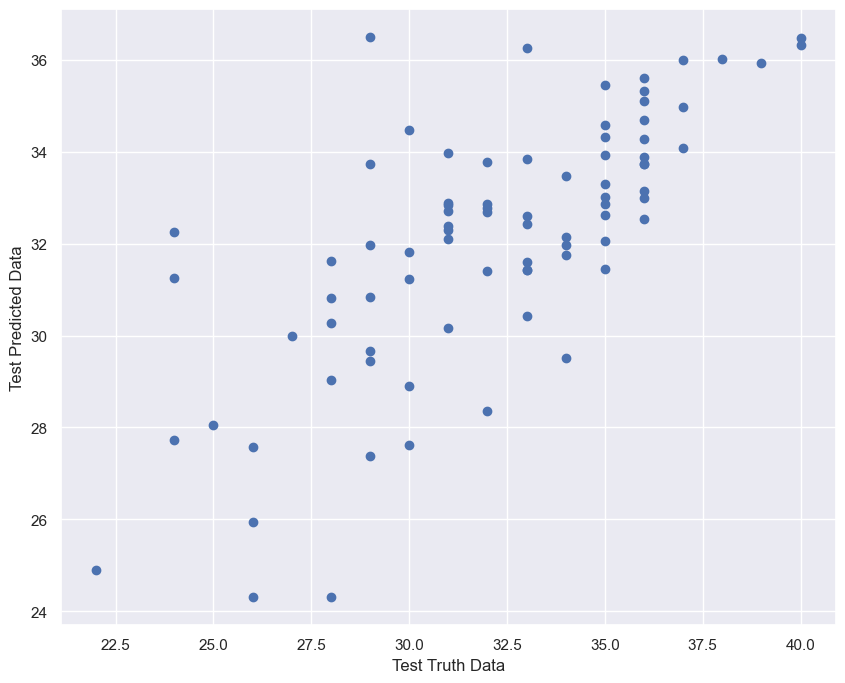

In [117]:
plt.scatter(y_test, reg_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

Observation :


In [118]:
# Residuals 

residuals = y_test - reg_pred
residuals

164    2.257966
60     1.713620
61     2.861616
63     3.557461
69     2.138003
         ...   
171    0.396998
234   -7.487294
146    1.396959
210   -3.263903
105   -2.897695
Name: Temperature, Length: 81, dtype: float64

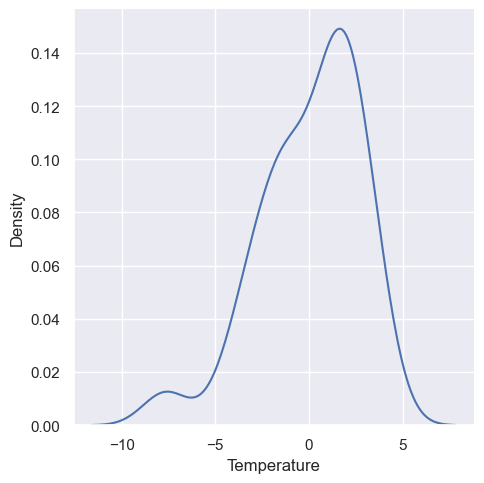

In [119]:
sns.displot(residuals, kind='kde')

#### Observation : 
- We got slightly left skewed plot

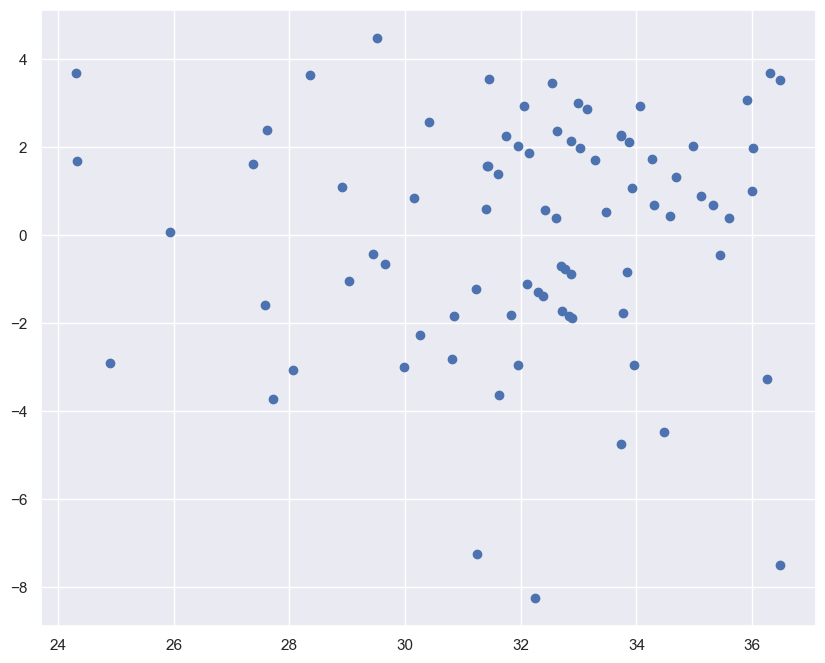

In [120]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(reg_pred, residuals)

# Homosedacity

#### Observation :
- There is a negative correlation

In [121]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

7.1363374654189204
2.1853980930902845
2.671392420708519


#### R squared and Adjusted R squared

In [122]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.5280945986553494


#### Observation :
- This model is a bad model

In [123]:
## Adjusted R squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.45286330278881093

## Ridge

In [124]:


from sklearn.linear_model import Ridge
ridge = Ridge()

In [125]:
# Training dataset

ridge.fit(X_train, y_train)

Ridge()

In [126]:
ridge_pred = ridge.predict(X_test)

### Assumption on Ridge Linear Regression 
##### 1st Assumption

Text(0, 0.5, 'Test Predicted Data')

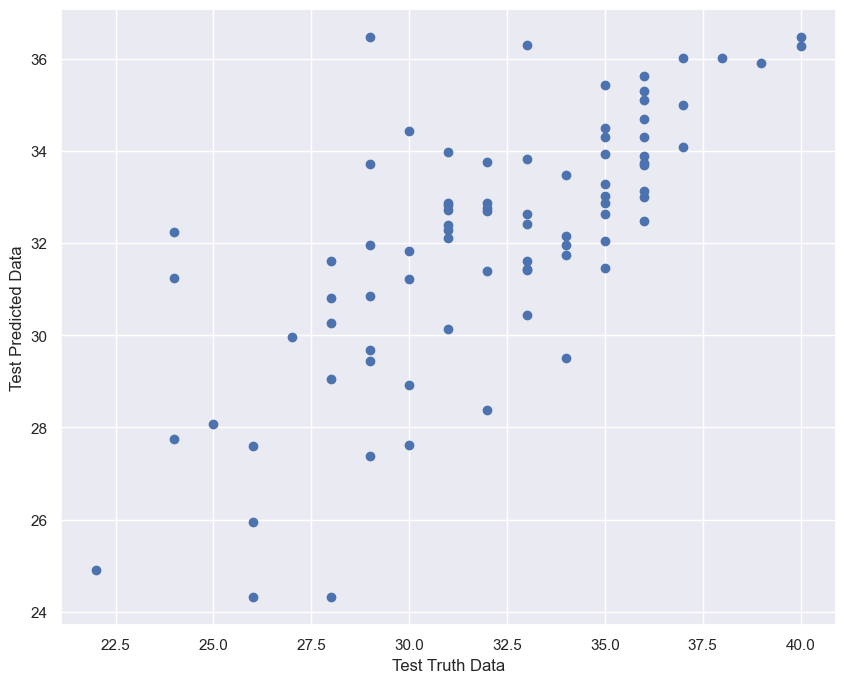

In [127]:
plt.scatter(y_test, ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

##### 2nd Assumption

In [128]:
# residuals

residuals = y_test - ridge_pred

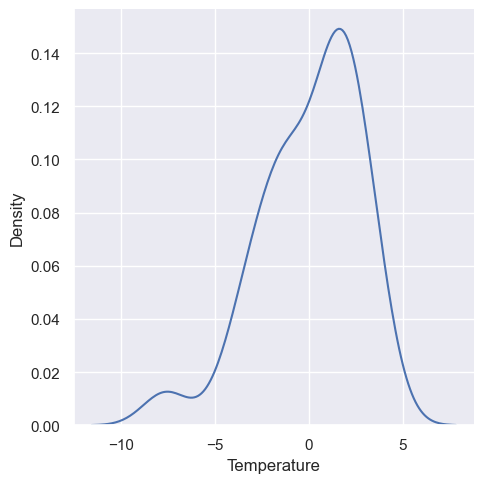

In [129]:
sns.displot(residuals, kind='kde')

#### Observation :
- We got slightly left skewed plot

##### 3rd Assumption

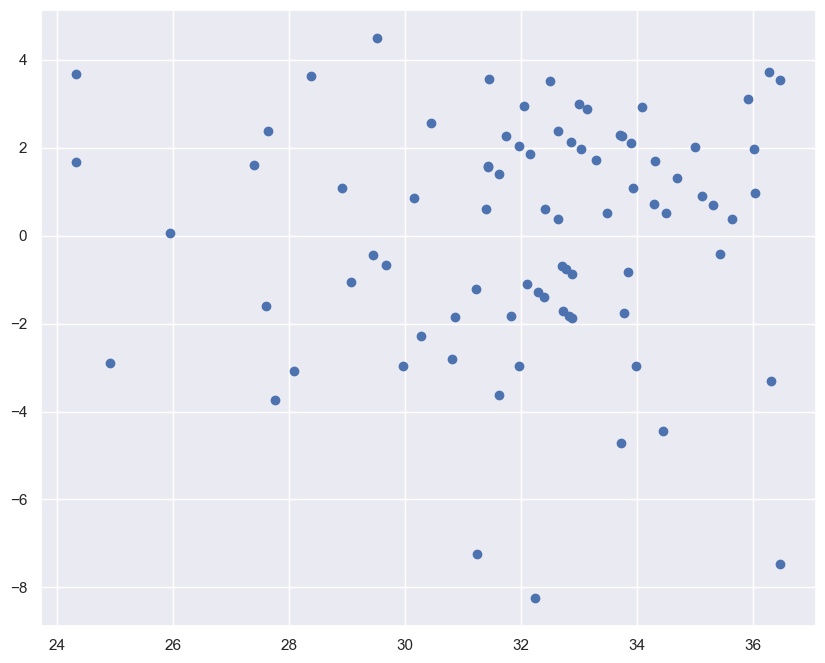

In [130]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(ridge_pred, residuals)

# Homosedacity

#### Observation :
- There is a negative correlation    

In [131]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, ridge_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(np.sqrt(mean_squared_error(y_test, ridge_pred)))

7.130575076346084
2.185292243110118
2.6703136662845592


#### R squared and Adjusted R squared

In [132]:
from sklearn.metrics import r2_score
score = r2_score(y_test, ridge_pred)
print(score)

0.528475648814664


#### Observation :
- This model is a bad model

In [133]:
## Adjusted R squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4533051000749728

## Lasso

In [134]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

Lasso()

In [135]:
lasso.fit(X_train, y_train)

Lasso()

In [136]:
lasso_pred = lasso.predict(X_test)

### Assumption of Lasso Linear Regression
#### 1st Assumption

Text(0, 0.5, 'Test Predicted Data')

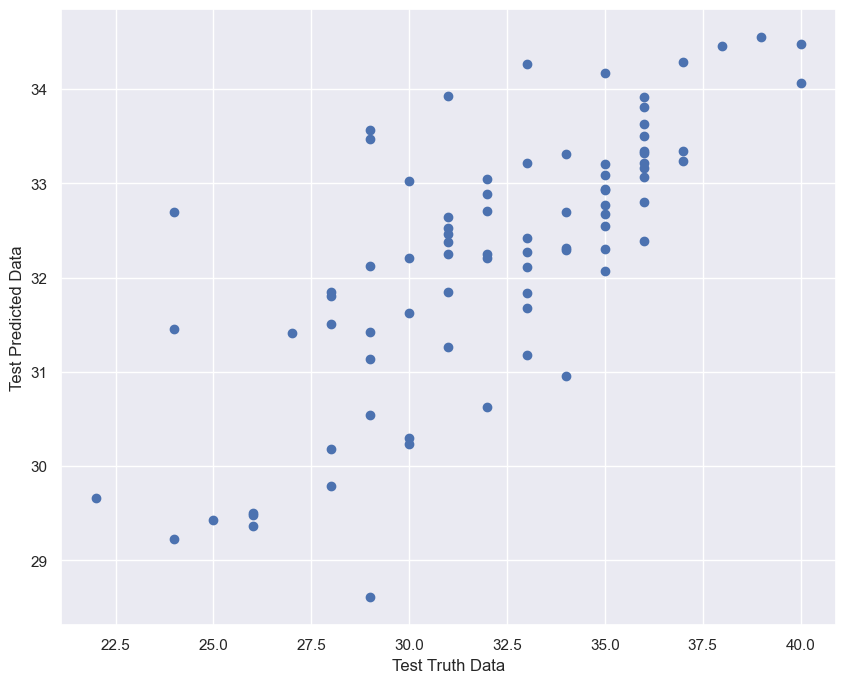

In [137]:
plt.scatter(y_test, lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

#### 2nd Assumption

In [138]:
# residuals

residuals = y_test - lasso_pred

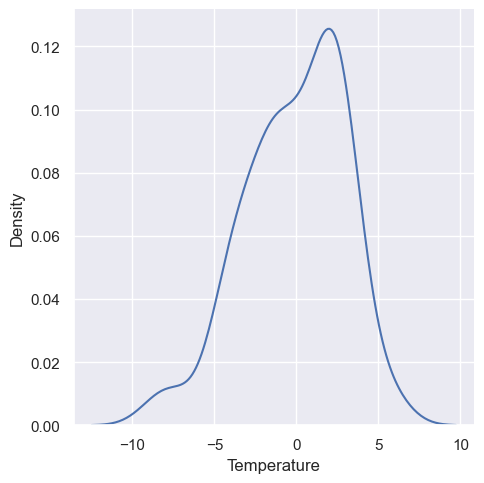

In [139]:
sns.displot(residuals, kind='kde')

#### Observation :
- We got slightly left skewed plot

#### 3rd Assumption

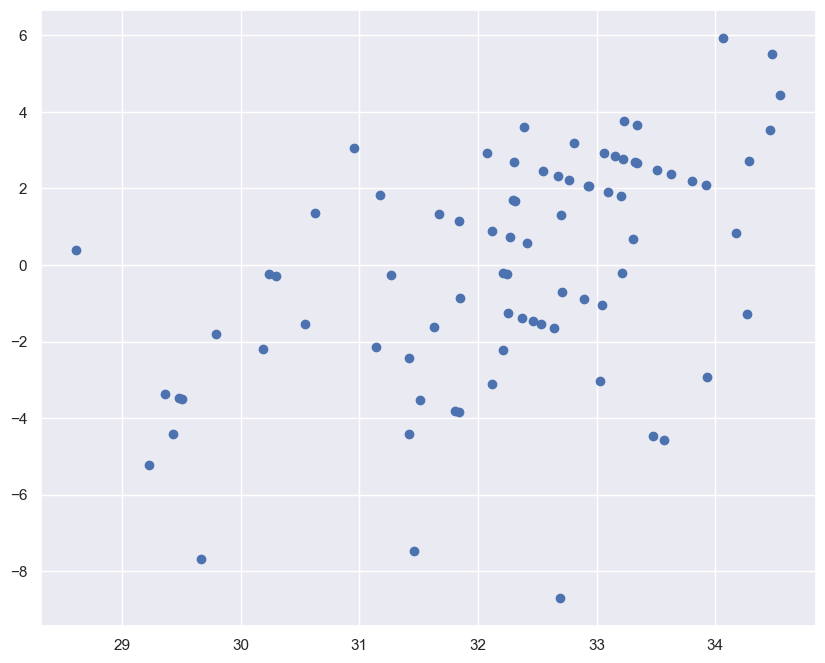

In [140]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(lasso_pred, residuals)

# Homosedacity

#### Observation :
- There is a negative correlation

In [141]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, lasso_pred))
print(mean_absolute_error(y_test, lasso_pred))
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


#### R squared and Adjusted R squared

In [142]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lasso_pred)
print(score)

0.39784019626969913


In [143]:
## Adjusted R squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.301843705819941

## Elastic net

In [144]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic

ElasticNet()

In [145]:
elastic.fit(X_train, y_train)

ElasticNet()

In [146]:
# prediction for test data

elastic_pred = elastic.predict(X_test)

### Assumptions of linear regression
#### 1st Assumption

Text(0, 0.5, 'Test Predicted Data')

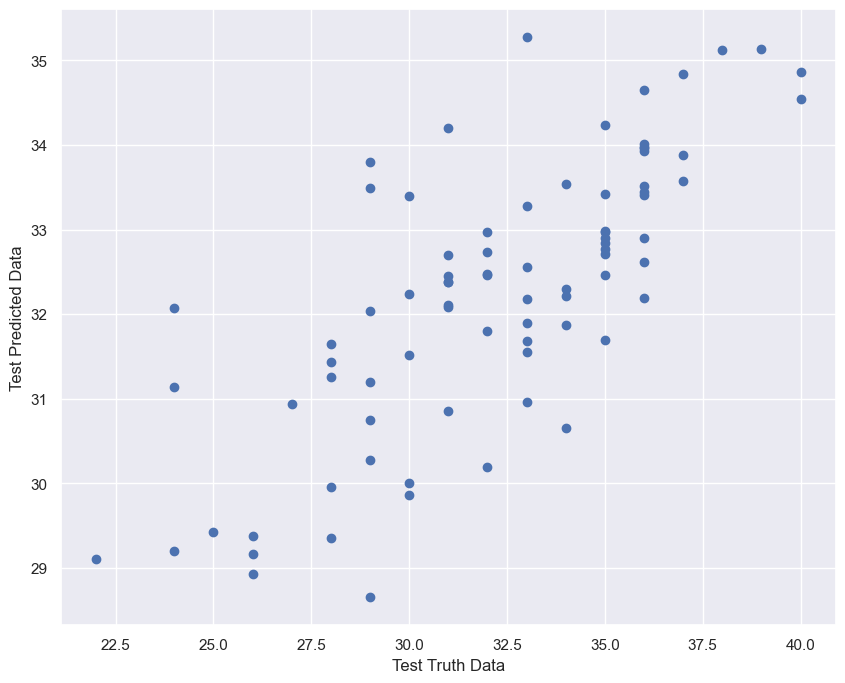

In [147]:
plt.scatter(y_test, elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [148]:
# residuals

residuals = y_test - elastic_pred

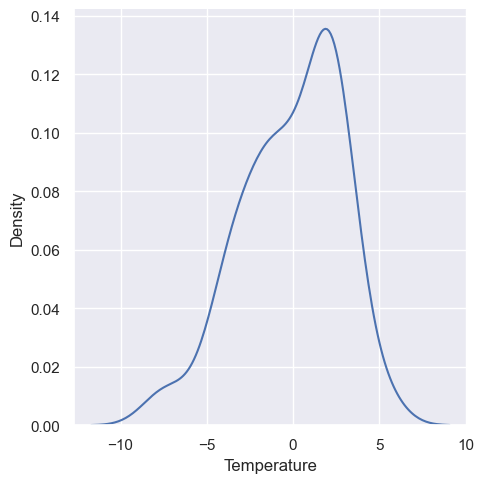

In [149]:
sns.displot(residuals, kind='kde')

#### Observation :
- We got slightly left skewed plot

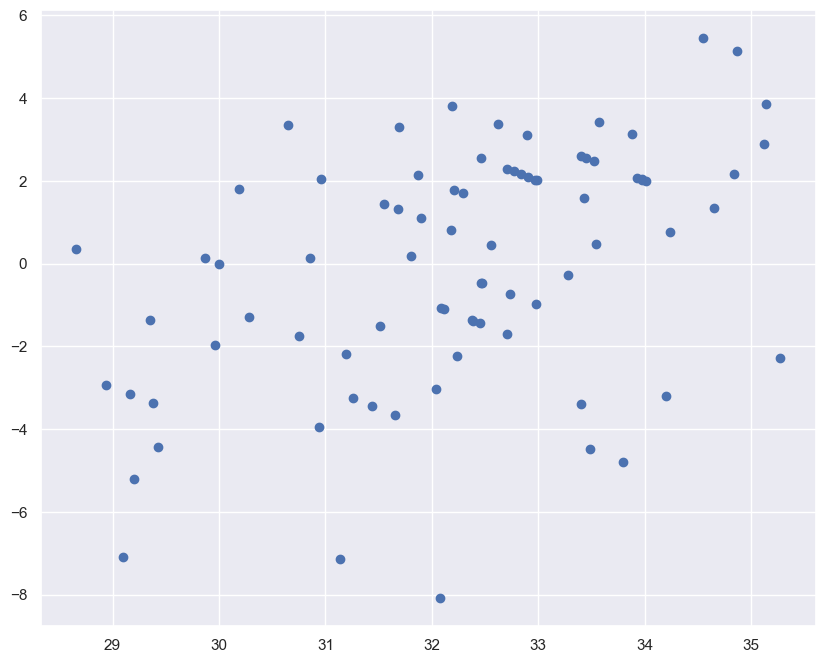

In [150]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(elastic_pred, residuals)

# Homosedacity

#### Observation :
- There is negative correlation

In [151]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, elastic_pred))
print(mean_absolute_error(y_test, elastic_pred))
print(np.sqrt(mean_squared_error(y_test, elastic_pred)))

8.293994917761445
2.3935882128483623
2.879929672363797


#### R squared and Adjusted R squared

In [152]:
from sklearn.metrics import r2_score
score = r2_score(y_test, elastic_pred)
print(score)

0.4515420522946154


#### Observation :
This is bad model

In [153]:
## Adjusted R squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3641067272981049